In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('project standard-table.csv', skiprows=6)
df.shape

(200, 42)

In [28]:
df.columns

Index(['[run number]', 'rice-seed-cost', 'drought-prob',
       'base-maintenance-cost', 'w_sc', 'w_def', 'base-share', 'num-farmers',
       'w_bal', 'base-theft', 'detection-likelihood', 'cotton-price',
       'mustard-price', 'theft_w_vwater', 'crop-stage-variance', 'theft_w_f',
       'wheat-price', 'w_str', 'cotton-seed-cost', 'heavy-rain-prob',
       'rice-price', 'base-living-cost-month', 'theft_w_sc', 'w_f',
       'mustard-seed-cost', 'flood-prob', 'theft_w_vsc', 'base-flow',
       'theft_w_str', 'wheat-seed-cost', 'water-randomness',
       'base-water-cost-per-unit', 'theft_w_def', '[step]', 'total-land',
       'mean [wealth] of farmers', 'standard-deviation [wealth] of farmers',
       'theft-volume', 'trade-volume', 'mean [strength] of friendships',
       'mean [social-credit] of farmers', 'report-all-farmer-data'],
      dtype='object')

In [29]:
df = df.drop(columns=df.columns[:34])
df.rename(columns={df.columns[0]: "Total Land", df.columns[1]: "Average Wealth", df.columns[2]: "Wealth Standard Deviation", df.columns[3]: "Total Theft Volume", df.columns[4]: "Total Trade Volume", df.columns[5]: "Average Friendship Strength", df.columns[6]: "Average Social Credit"}, inplace=True)
df

,Total Land,Average Wealth,Wealth Standard Deviation,Total Theft Volume,Total Trade Volume,Average Friendship Strength,Average Social Credit,report-all-farmer-data
0,175,1.138175e+07,1.425549e+07,14.046029,303.864904,0.748971,5.057299,[[0 3 1.4881533639673844E7 1.0884150738424379 ...
1,197,-9.202906e+05,9.284372e+06,28.270499,253.096552,0.843445,6.850471,[[0 13 3.73401355472509E7 2.013391300399202 0 ...
2,217,-6.015447e+06,4.113712e+06,396.726651,234.601694,0.835802,-3.220038,[[0 3 1888502.6680185425 -10 0 25 [3 7 0 11] [...
3,204,-1.797930e+06,9.809218e+06,305.151679,276.433524,0.764622,-4.244365,[[0 3 8693722.733285706 -15.235016901019772 0 ...
4,208,-4.757008e+06,4.693031e+06,205.324680,286.205476,0.783409,1.930032,[[0 3 5206909.078423449 -11.011 0 29 [3 7 0 11...
...,...,...,...,...,...,...,...,...
195,197,7.742086e+05,1.021975e+07,61.441177,219.674613,0.791046,3.841831,[[0 3 8174592.239948283 -10.35 0 16 [1 9 0 11]...
196,179,3.242103e+06,9.362982e+06,20.648770,290.878311,0.858528,6.614320,[[0 3 1.0381024901158156E7 -2.862072843803322 ...
197,191,3.599840e+06,1.853552e+07,59.506073,262.905151,0.820146,4.142682,[[0 3 8607639.606176782 -3.3426578159800173 0 ...
198,245,-7.306231e+06,4.987337e+06,1919.437166,248.628308,0.683366,-10.526878,[[0 7 1097437.9465591623 -14.177874848389294 0...


In [30]:
df["report-all-farmer-data"] = df["report-all-farmer-data"].str.replace(" ", ",")
import ast
df_farmer_data = pd.DataFrame({"parsed_farmer_data" : df["report-all-farmer-data"].apply(ast.literal_eval)})
df_exploded = df_farmer_data.explode("parsed_farmer_data").reset_index(drop=True)
df_exploded

,parsed_farmer_data
0,"[0, 3, 14881533.639673844, 1.0884150738424379,..."
1,"[1, 3, 11263425.73218654, 0.9300083386302972, ..."
2,"[2, 3, 6832306.715322736, 0.796579807564592, 0..."
3,"[3, 10, 50975516.43671354, 2.415415875810366, ..."
4,"[4, 3, 11431384.084299123, 2.4265947725649823,..."
...,...
6595,"[28, 8, -11256368.566881545, 7.887870987040054..."
6596,"[29, 4, -5806763.986009775, 5.3651574771389985..."
6597,"[30, 3, -5714783.621127695, 11.6731637454988, ..."
6598,"[31, 6, -6092202.828496369, 6.848139794453795,..."


In [31]:
FARMER_COLUMNS = [
    'ycor_agent', 'land-size_agent', 'wealth_agent', 
    'social-credit_agent', 'times-robbed_agent', 'num-shares_agent', 
    'crops-used_agent', 'strategies-used_agent'
]

farmer_attributes = pd.Series(df_exploded['parsed_farmer_data'])

df_farmer_details = pd.DataFrame(
    farmer_attributes.tolist(), 
    columns=FARMER_COLUMNS
)

df_farmer_details

# build sim_id mapping (df_farmer_data contains the list-of-farmers per simulation)
sim_counts = df_farmer_data['parsed_farmer_data'].apply(len).values
sim_ids = np.repeat(df.index.values, sim_counts)  # df.index corresponds to simulation rows
df_farmer_details['sim_id'] = sim_ids

Correlation of Total Land with simulation metrics:
 Total Land vs Average Wealth: -0.8944
 Total Land vs Wealth Standard Deviation: -0.7193
 Total Land vs Total Theft Volume: 0.8874
 Total Land vs Total Trade Volume: -0.4443
 Total Land vs Average Friendship Strength: 0.1545
 Total Land vs Average Social Credit: -0.8410


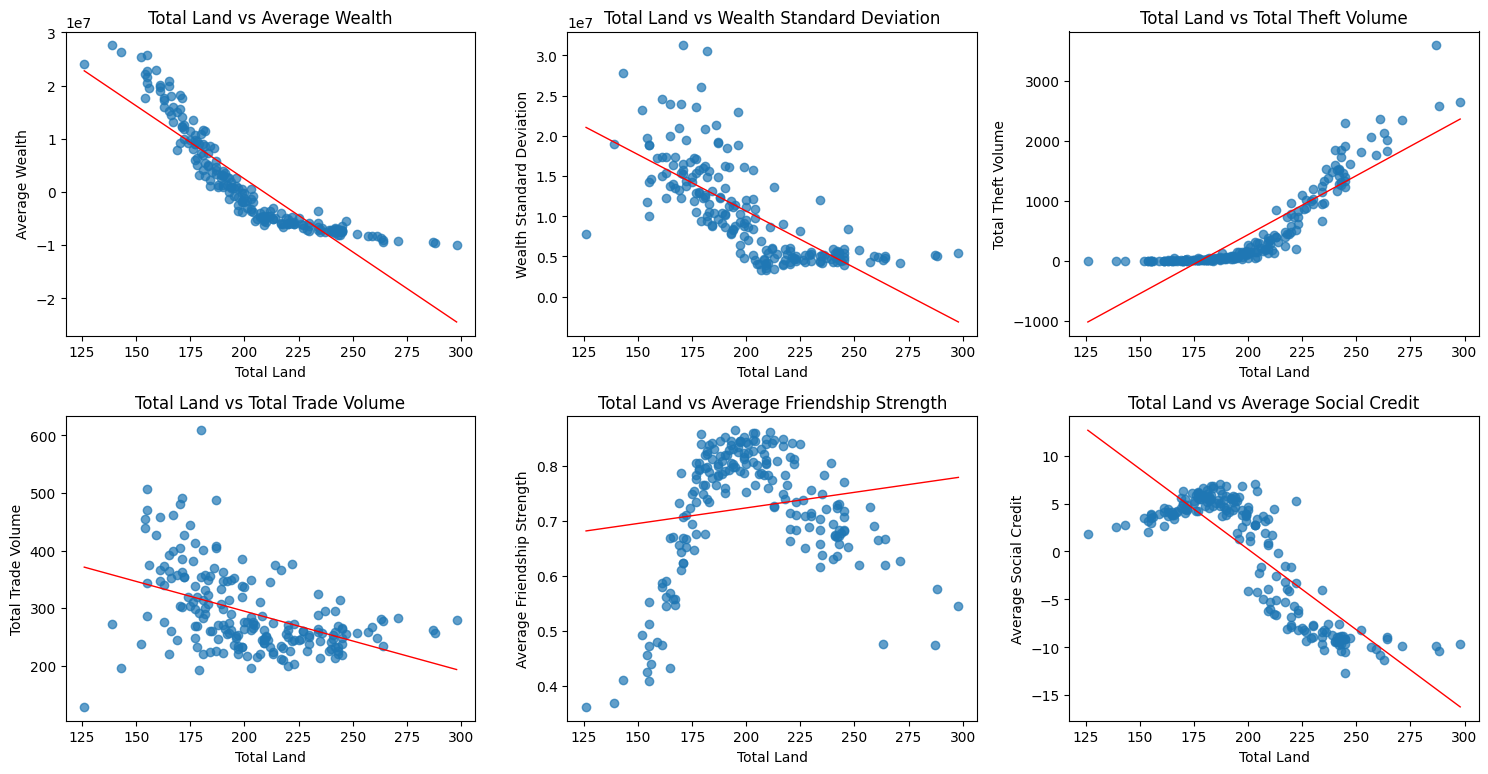

In [32]:
# Correlations of total land with simulation-level metrics
metrics = df.columns[1:7]  # assuming these are the metrics of interest

print("Correlation of Total Land with simulation metrics:")
for m in metrics:
    print(f" Total Land vs {m}: {df['Total Land'].corr(df[m]):.4f}")

# Scatter plots: Total Land vs each metric (2x3)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()
for ax, m in zip(axes, metrics):
    ax.scatter(df['Total Land'], df[m], alpha=0.7)
    # simple linear fit line
    try:
        coef = np.polyfit(df['Total Land'], df[m], 1)
        xs = np.linspace(df['Total Land'].min(), df['Total Land'].max(), 50)
        ax.plot(xs, np.polyval(coef, xs), color='red', lw=1)
    except Exception:
        pass
    ax.set_xlabel('Total Land')
    ax.set_ylabel(m)
    ax.set_title(f"Total Land vs {m}")
plt.tight_layout()
plt.show()


Correlation between theft-volume and trade-volume: -0.3621


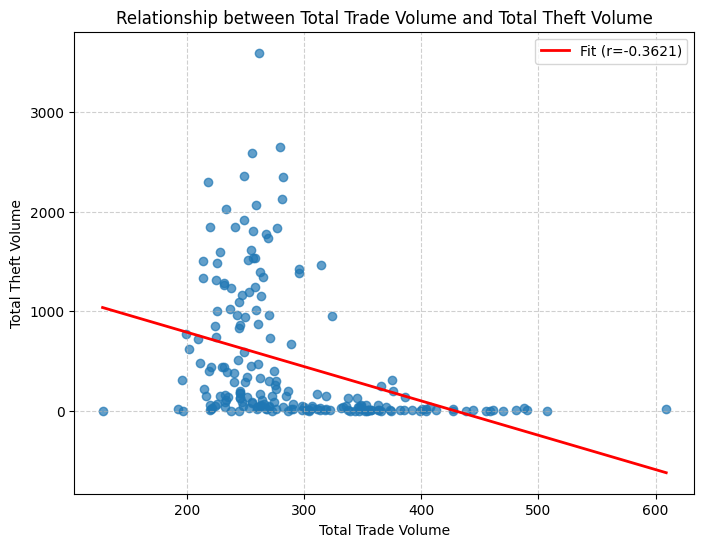

In [33]:
print("\nCorrelation between theft-volume and trade-volume:",
      f"{df['Total Theft Volume'].corr(df['Total Trade Volume']):.4f}")

fig_theft_trade, ax_theft_trade = plt.subplots(figsize=(8, 6))

# Scatter plot of theft-volume (Y-axis) vs trade-volume (X-axis)
ax_theft_trade.scatter(df['Total Trade Volume'], df['Total Theft Volume'], alpha=0.7)

# Add a simple linear fit line for context
try:
    # Fit the line: Y = mX + c, where X is trade-volume and Y is theft-volume
    coef = np.polyfit(df['Total Trade Volume'], df['Total Theft Volume'], 1)
    
    # Create x-values for the line plot
    xs = np.linspace(df['Total Trade Volume'].min(), df['Total Trade Volume'].max(), 50)
    
    # Plot the fit line
    ax_theft_trade.plot(xs, np.polyval(coef, xs), color='red', lw=2, 
                        label=f'Fit (r={df["Total Theft Volume"].corr(df["Total Trade Volume"]):.4f})')
except Exception:
    pass

# Set labels and title
ax_theft_trade.set_xlabel('Total Trade Volume')
ax_theft_trade.set_ylabel('Total Theft Volume')
ax_theft_trade.set_title('Relationship between Total Trade Volume and Total Theft Volume')
ax_theft_trade.grid(True, linestyle='--', alpha=0.6)
ax_theft_trade.legend()

# Display both figures
plt.show()


Per-farmer correlations:
 ycor_agent vs wealth_agent: -0.3728
 ycor_agent vs social-credit_agent: 0.4278
 ycor_agent vs times-robbed_agent: 0.1484
 ycor_agent vs num-shares_agent: 0.6958
 land-size_agent vs wealth_agent: 0.0323
 land-size_agent vs social-credit_agent: -0.0758
 land-size_agent vs times-robbed_agent: 0.5941
 land-size_agent vs num-shares_agent: -0.0571


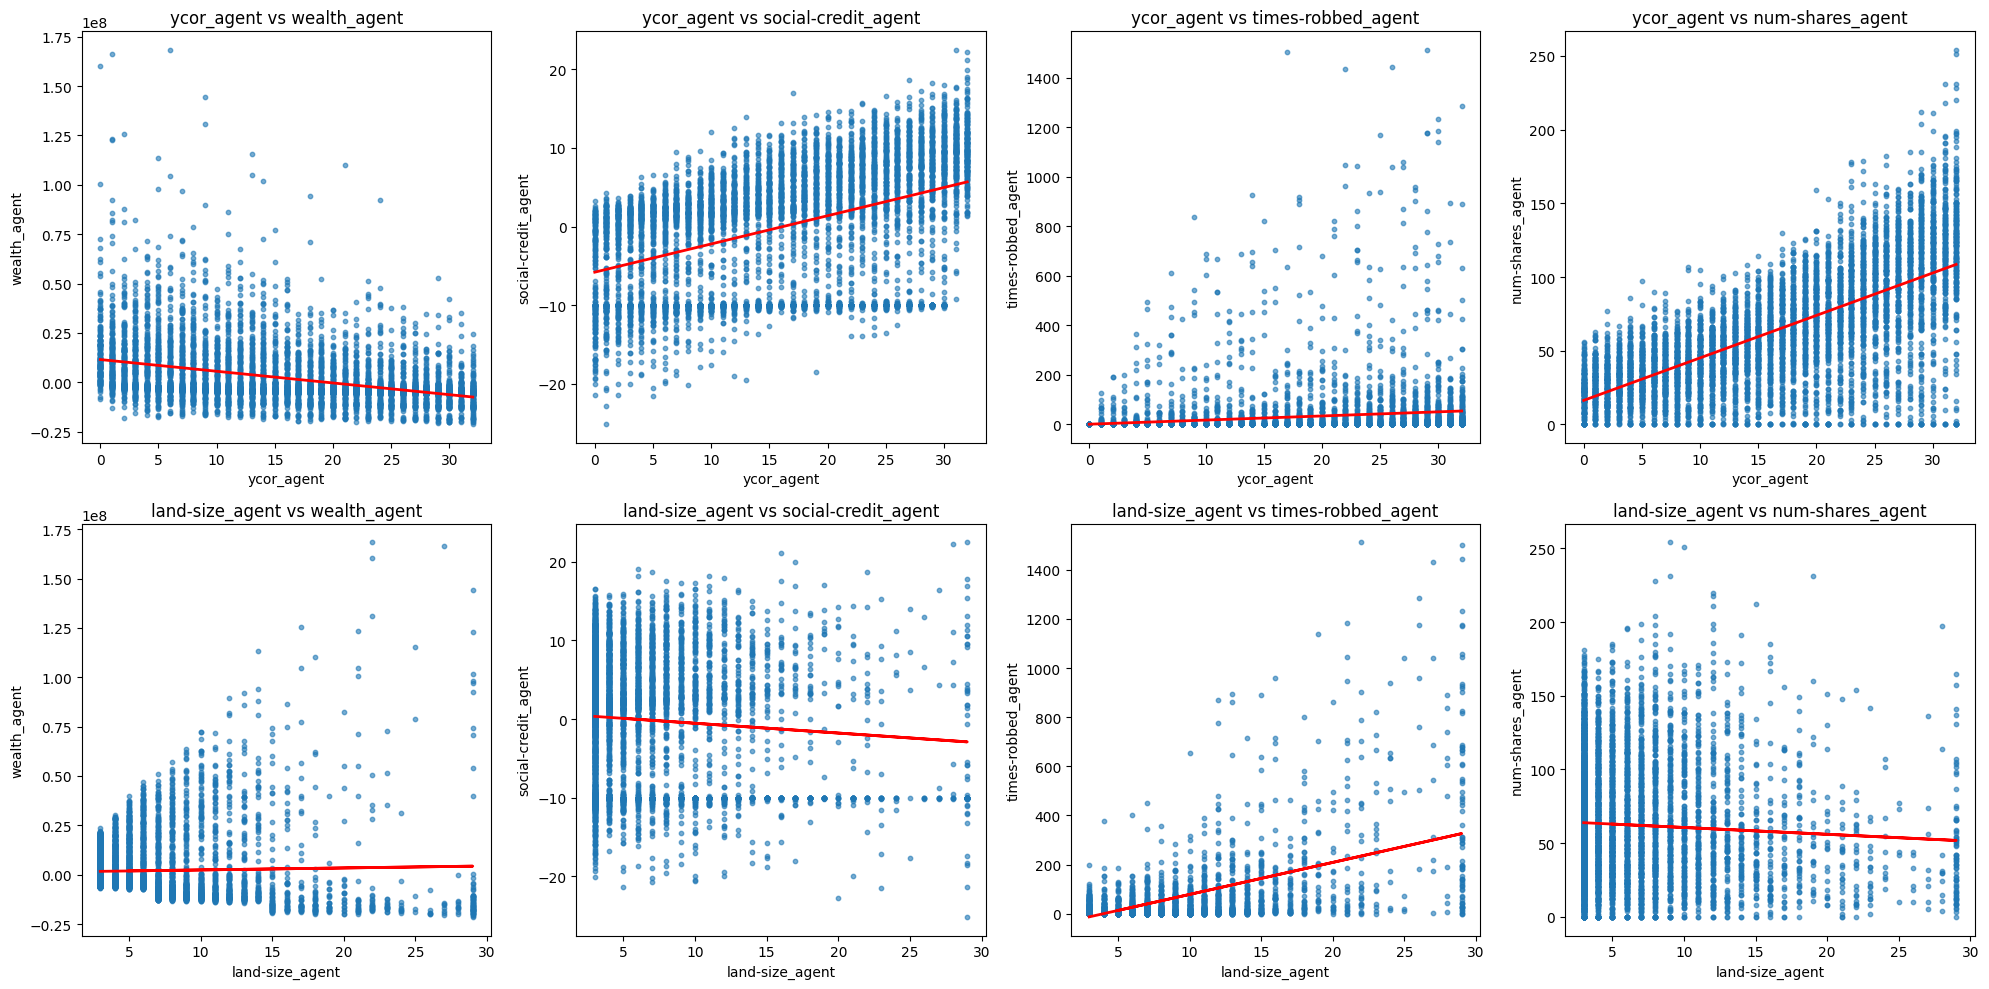

In [34]:
# total land per simulation and attach to df
total_land_per_sim = df_farmer_details.groupby('sim_id')['land-size_agent'].sum()
df['Total Land'] = df.index.map(total_land_per_sim.to_dict())

# Per-farmer correlations: ycor and land-size with wealth, social-credit, times-robbed, num-shares
farmer_vars = ['ycor_agent', 'land-size_agent']
farmer_targets = ['wealth_agent', 'social-credit_agent', 'times-robbed_agent', 'num-shares_agent']

print("\nPer-farmer correlations:")
for v in farmer_vars:
    for t in farmer_targets:
        print(f" {v} vs {t}: {df_farmer_details[v].corr(df_farmer_details[t]):.4f}")

# Scattergrid for per-farmer relationships (two rows: ycor and land-size)
fig, axes = plt.subplots(2, len(farmer_targets), figsize=(5*len(farmer_targets), 10))
for i, v in enumerate(farmer_vars):
    for j, t in enumerate(farmer_targets):
        ax = axes[i, j]

        x = df_farmer_details[v]
        y = df_farmer_details[t]

        # Scatter plot
        ax.scatter(x, y, s=10, alpha=0.6)

        # Line of best fit
        mask = x.notna() & y.notna()
        m, b = np.polyfit(x[mask], y[mask], 1)
        ax.plot(x, m*x + b, color='red', lw=2)

        ax.set_xlabel(v)
        ax.set_ylabel(t)
        ax.set_title(f"{v} vs {t}")
plt.tight_layout()
plt.show()



/tmp/ipykernel_5172/1447159636.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


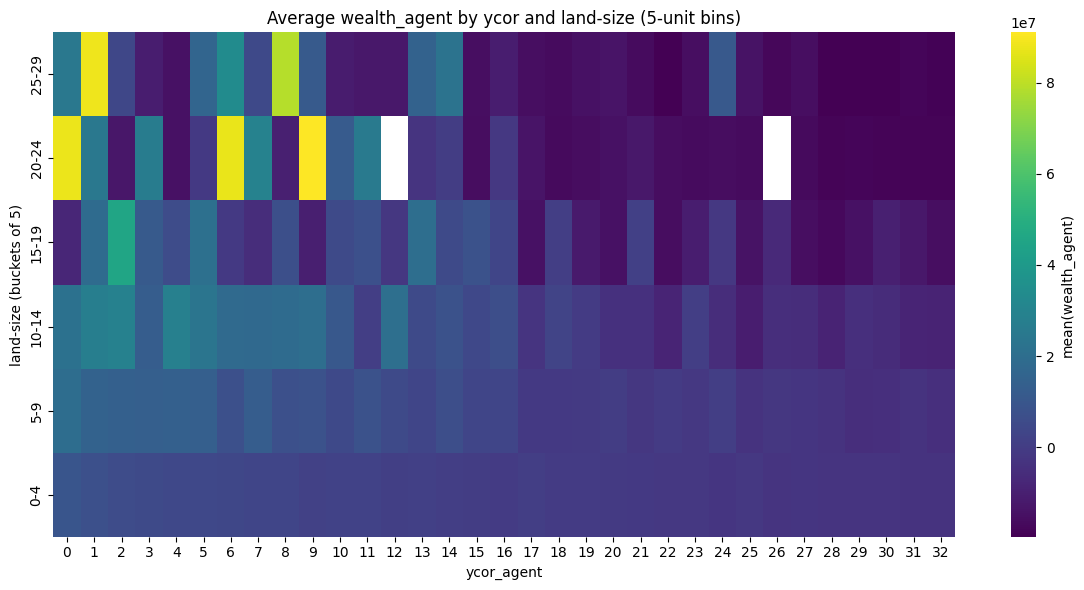

/tmp/ipykernel_5172/1447159636.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


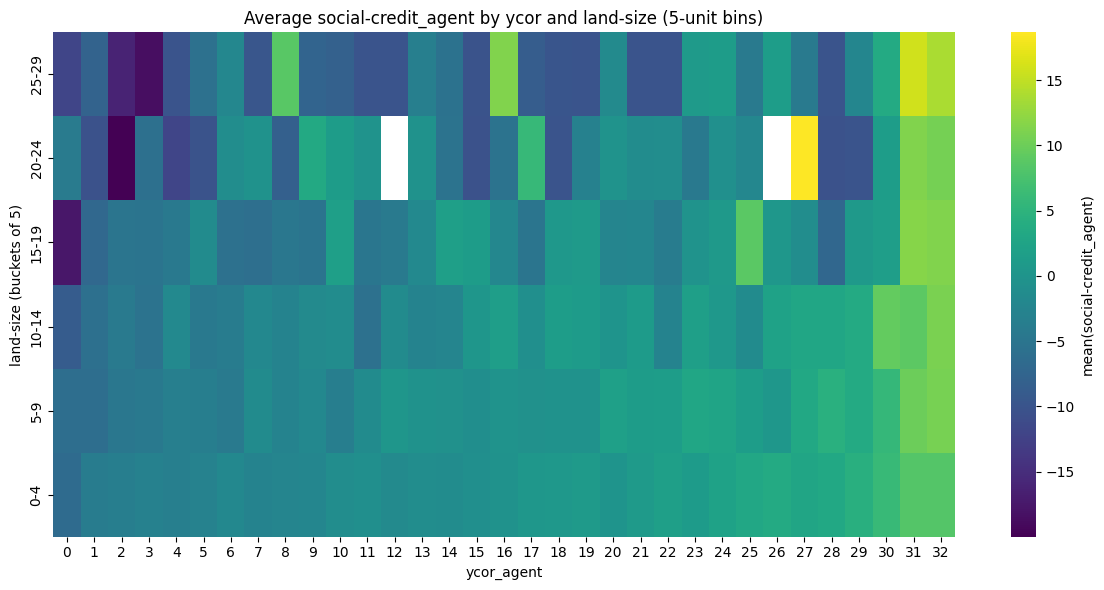

/tmp/ipykernel_5172/1447159636.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


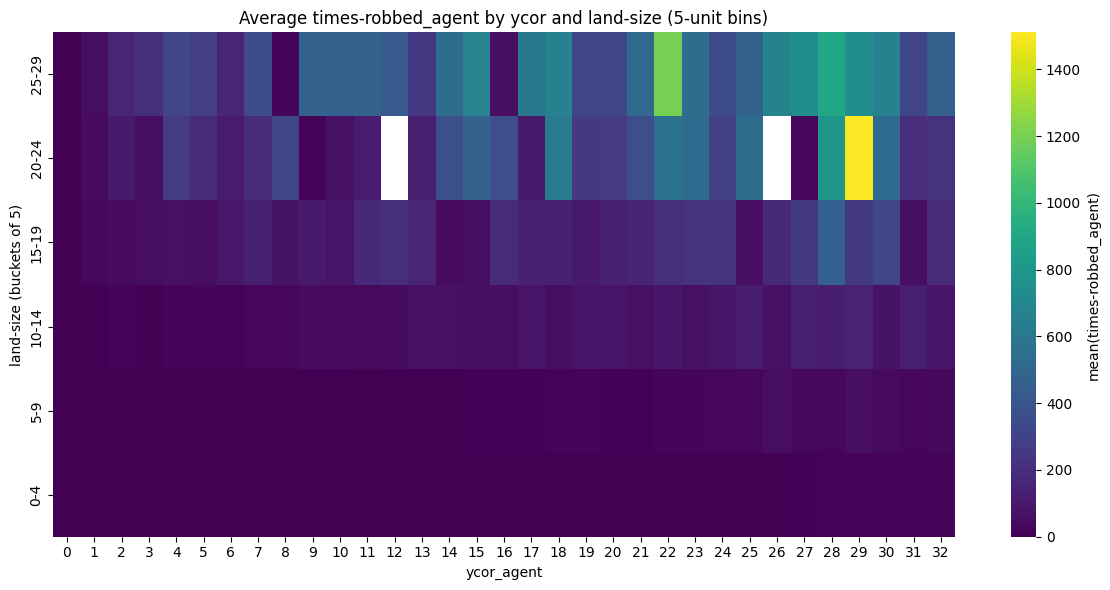

/tmp/ipykernel_5172/1447159636.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


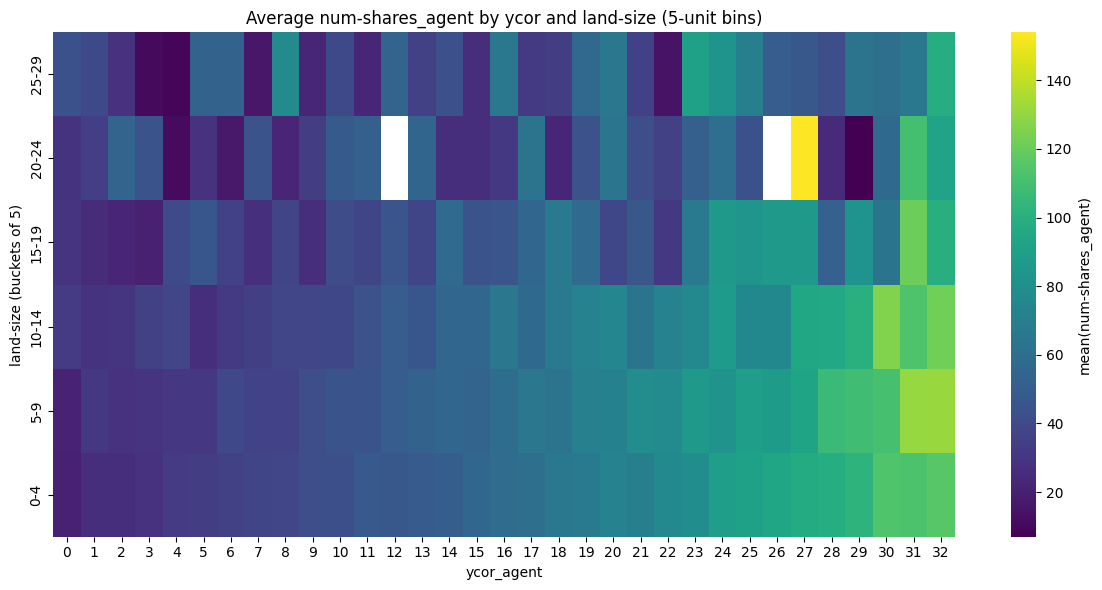

In [35]:
# 2D binned heatmap: x = ycor_agent, y = land-size_agent buckets (width=5), color = mean(attribute)
farmer_targets = ['wealth_agent', 'social-credit_agent', 'times-robbed_agent', 'num-shares_agent']

for attribute in farmer_targets:
    # Create land-size bins of width 5
    min_land = int(df_farmer_details['land-size_agent'].min())
    max_land = int(df_farmer_details['land-size_agent'].max())
    bins = list(range((min_land // 5) * 5, ((max_land // 5) + 2) * 5, 5))
    labels = [f"{b}-{b+4}" for b in bins[:-1]]
    df_farmer_details['land_bin'] = pd.cut(df_farmer_details['land-size_agent'], bins=bins, labels=labels, right=False, include_lowest=True)

    # Group by land-bin and ycor and compute mean of the attribute
    grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()

    # Pivot to wide format: rows = land_bin, cols = ycor_agent
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=attribute)

    # Sort rows (land bins) and columns (ycor) for consistent plotting
    pivot = pivot.reindex(labels)  # ensure all land bins are present in order
    try:
        # If ycor_agent is numeric, sort columns numerically
        sorted_cols = sorted([c for c in pivot.columns if not pd.isna(c)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, max(6, len(pivot) * 0.35)))
    ax = sns.heatmap(pivot, cmap='viridis', cbar_kws={'label': f'mean({attribute})'}, annot=False, fmt='.2f')
    ax.set_xlabel('ycor_agent')
    ax.set_ylabel('land-size (buckets of 5)')
    ax.set_title(f'Average {attribute} by ycor and land-size (5-unit bins)')

    # By default heatmap places first row at top; invert so smallest land at bottom
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()


Per-farmer correlations: ycor/land-size vs crop positions
 ycor_agent vs Rice: 0.4191
 ycor_agent vs Cotton: -0.4191
 ycor_agent vs Wheat: -0.0507
 ycor_agent vs Mustard: 0.0507
 land-size_agent vs Rice: 0.0624
 land-size_agent vs Cotton: -0.0624
 land-size_agent vs Wheat: -0.0191
 land-size_agent vs Mustard: 0.0191


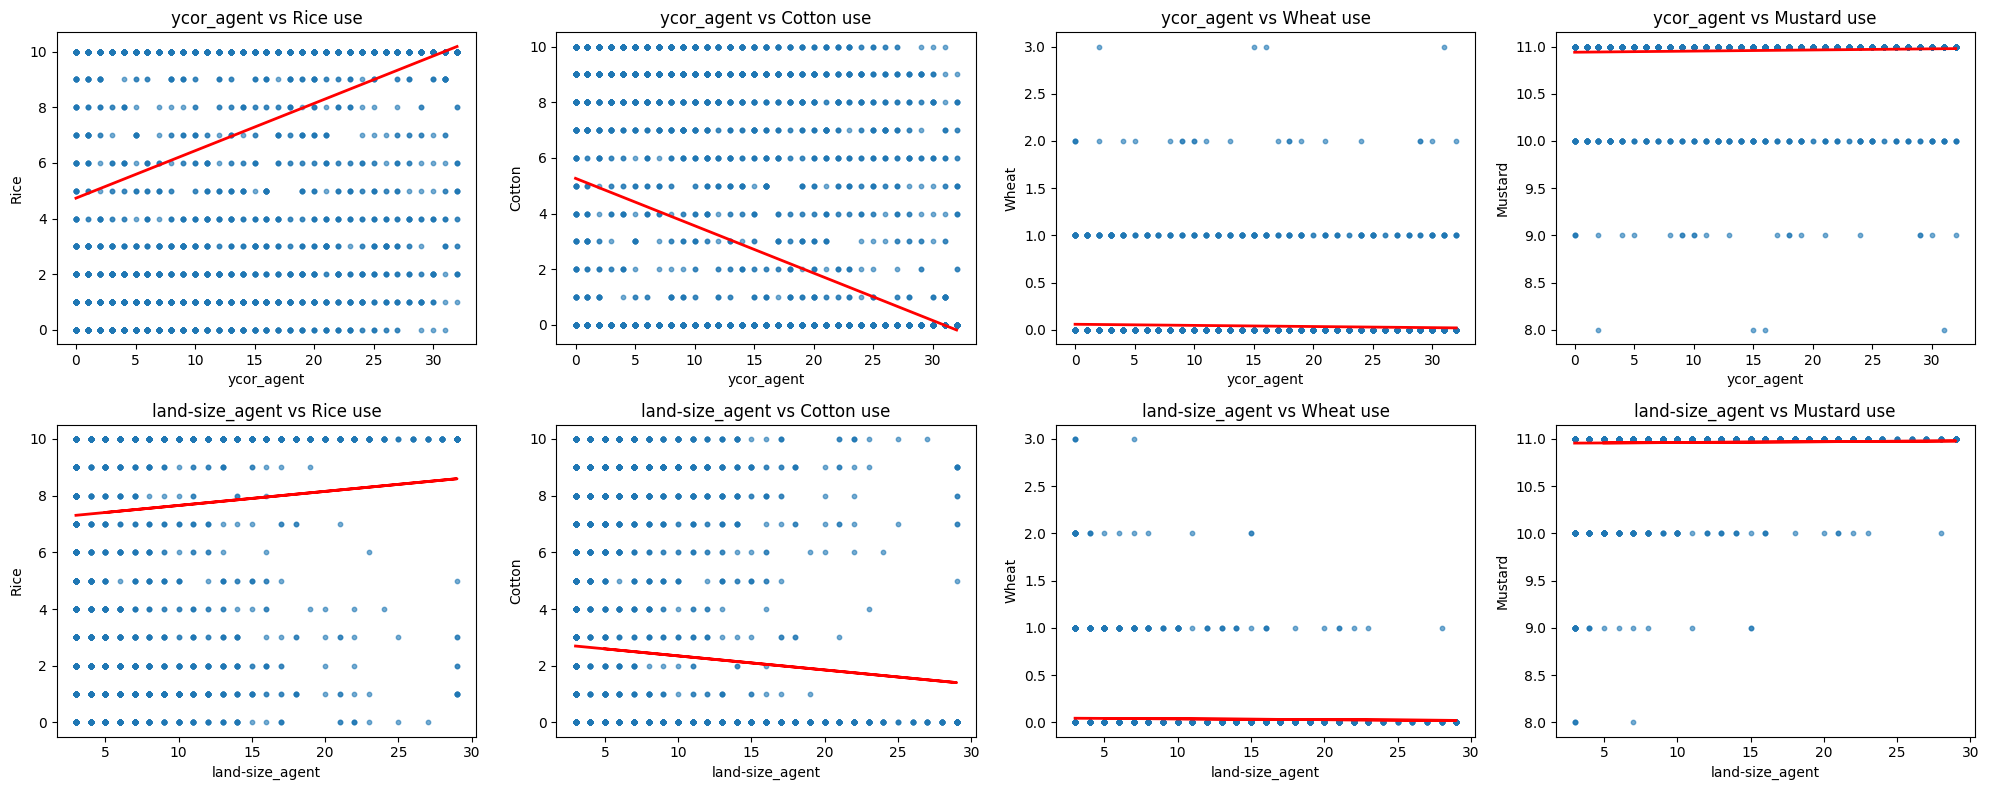

In [36]:
# --- Crop usage per-position analysis (4 positions) ---
# Expand crops-used_agent (each is a list of 4 values) into four columns and attach to df_farmer_details
crop_cols = [f'crop_{i}' for i in range(4)]
crop_cols = ["Rice", "Cotton", "Wheat", "Mustard"]
crops_expanded = pd.DataFrame(df_farmer_details['crops-used_agent'].tolist(), columns=crop_cols).fillna(0).astype(int)
for c in crop_cols:
    df_farmer_details[c] = crops_expanded[c]

# Per-farmer correlations: ycor and land-size with each crop position
farmer_vars = ['ycor_agent', 'land-size_agent']
print('\nPer-farmer correlations: ycor/land-size vs crop positions')
for v in farmer_vars:
    for c in crop_cols:
        corr = df_farmer_details[v].corr(df_farmer_details[c])
        print(f" {v} vs {c}: {corr:.4f}")

# Scattergrid: 2 rows (ycor, land-size) x 4 cols (crop_0..crop_3)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, len(crop_cols), figsize=(5*len(crop_cols), 8))
for i, v in enumerate(farmer_vars):
    for j, c in enumerate(crop_cols):
        ax = axes[i, j] if len(crop_cols) > 1 else axes[i]

        x = df_farmer_details[v]
        y = df_farmer_details[c]

        # Scatter plot
        ax.scatter(x, y, s=10, alpha=0.6)

        # Line of best fit
        mask = x.notna() & y.notna()
        if mask.sum() > 1:  # avoid polyfit errors
            m, b = np.polyfit(x[mask], y[mask], 1)
            ax.plot(x, m*x + b, color='red', lw=2)

        ax.set_xlabel(v)
        ax.set_ylabel(c)
        ax.set_title(f"{v} vs {c} use")
plt.tight_layout()
plt.show()

/tmp/ipykernel_5172/277244484.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[c].mean().reset_index()
/tmp/ipykernel_5172/277244484.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[c].mean().reset_index()
/tmp/ipykernel_5172/277244484.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = d

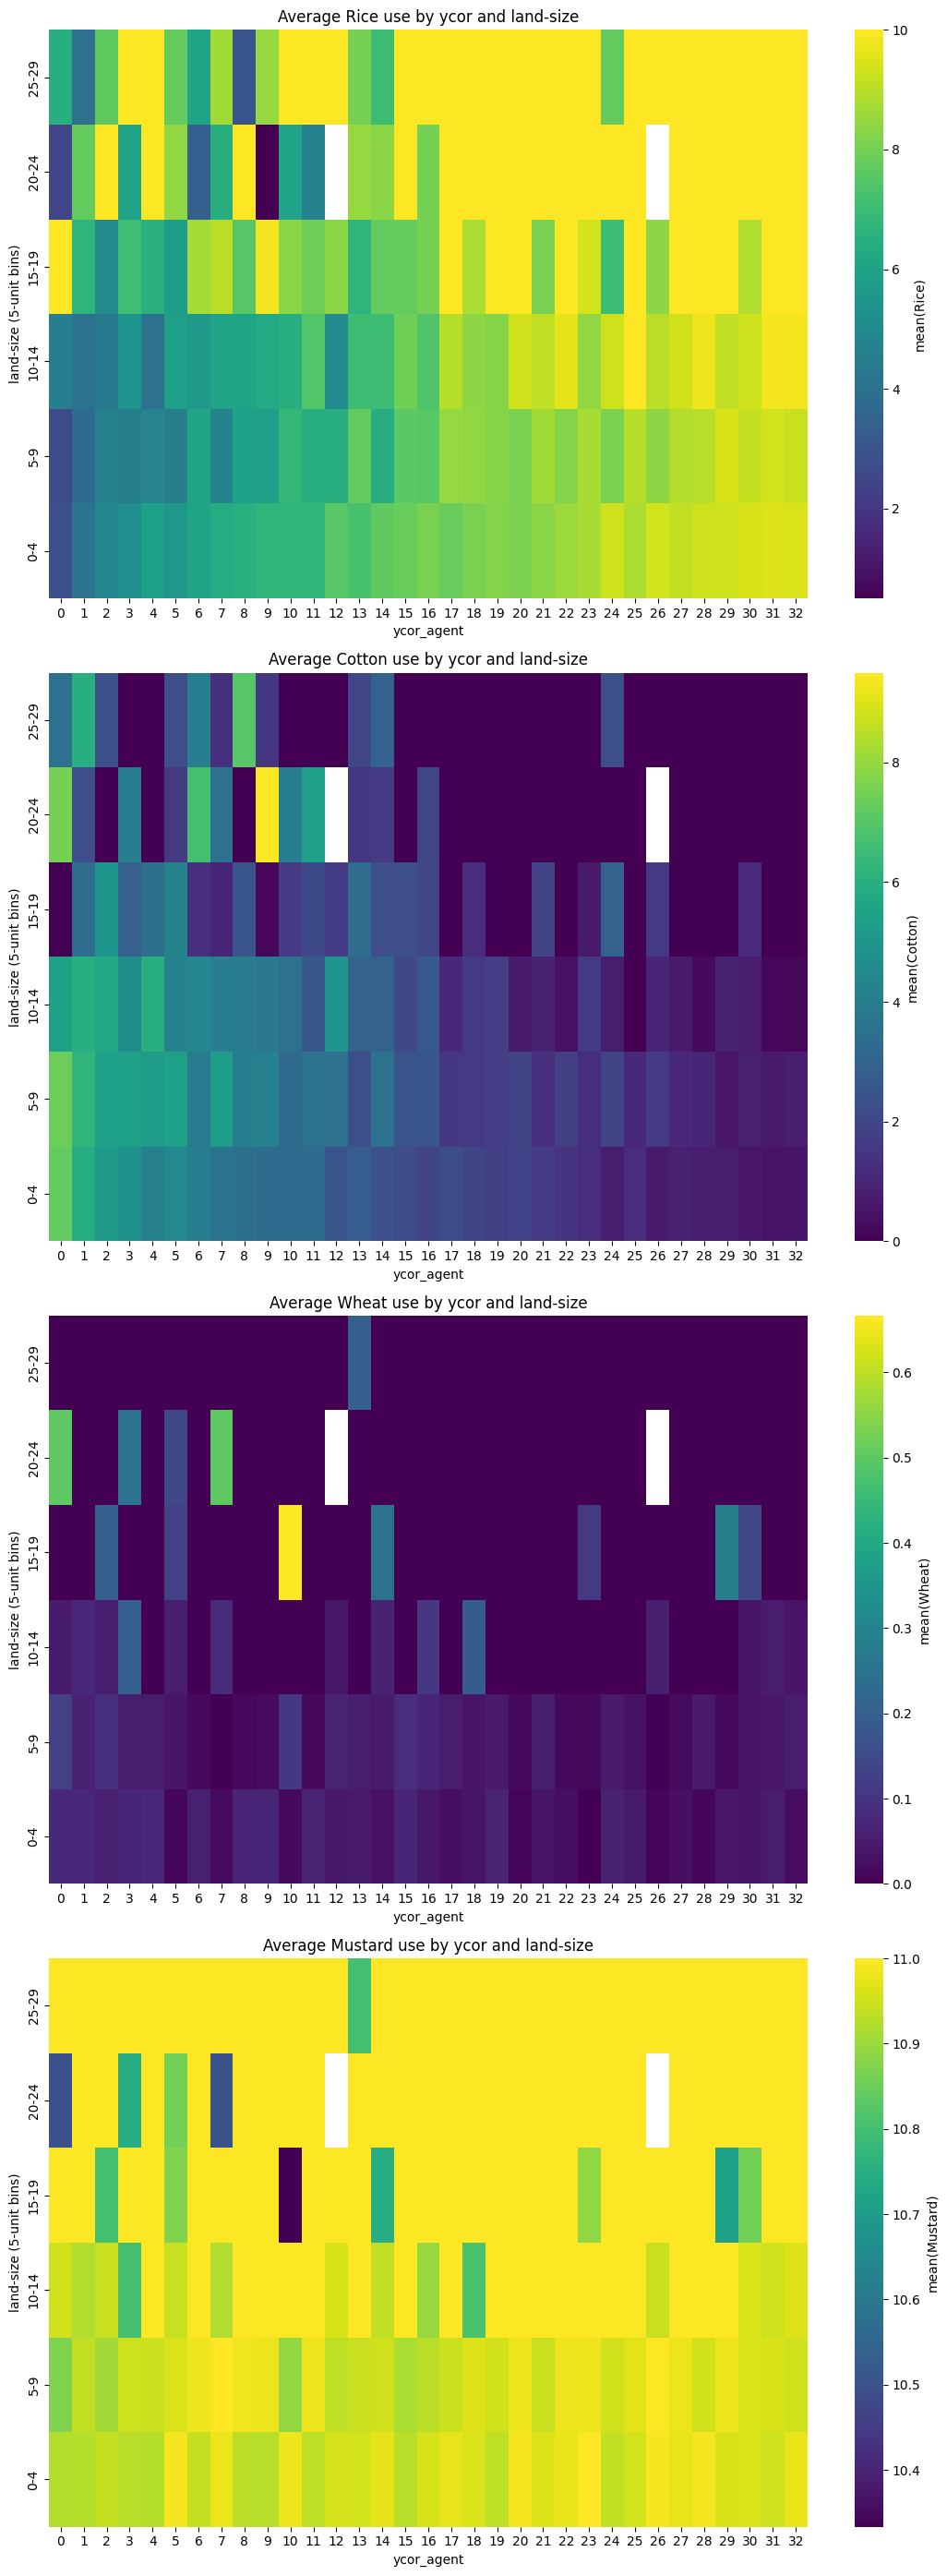

In [37]:
# Binned heatmaps for crop usage (4 positions)
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure crop columns exist (expand if not already present)
crop_cols = ["Rice", "Cotton", "Wheat", "Mustard"]
if not all(c in df_farmer_details.columns for c in crop_cols):
    crops_expanded = pd.DataFrame(df_farmer_details['crops-used_agent'].tolist(), columns=crop_cols).fillna(0).astype(int)
    for c in crop_cols:
        df_farmer_details[c] = crops_expanded[c]

# Create land-size bins of width 5
min_land = int(df_farmer_details['land-size_agent'].min())
max_land = int(df_farmer_details['land-size_agent'].max())
bins = list(range((min_land // 5) * 5, ((max_land // 5) + 2) * 5, 5))
labels = [f"{b}-{b+4}" for b in bins[:-1]]
df_farmer_details['land_bin'] = pd.cut(df_farmer_details['land-size_agent'], bins=bins, labels=labels, right=False, include_lowest=True)

# Create one figure with 4x1 heatmaps (one per crop position)
fig, axes = plt.subplots(4, 1, figsize=(11, 7*4))
for i, c in enumerate(crop_cols):
    grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[c].mean().reset_index()
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=c)
    pivot = pivot.reindex(labels)  # ensure all land bins present in order
    try:
        sorted_cols = sorted([col for col in pivot.columns if not pd.isna(col)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass
    ax = axes[i] if len(crop_cols) > 1 else axes
    sns.heatmap(pivot, ax=ax, cmap='viridis', cbar_kws={'label': f'mean({c})'}, annot=False, fmt='.2f')
    ax.set_title(f'Average {c} use by ycor and land-size')
    ax.set_xlabel('ycor_agent')
    ax.set_ylabel('land-size (5-unit bins)')
    ax.invert_yaxis()
plt.tight_layout()
plt.show()


Per-farmer correlations: ycor/land-size vs strategy positions
 ycor_agent vs Baseline: 0.2463
 ycor_agent vs Poor/High-Risk: 0.5655
 ycor_agent vs Buy/Trade-Aggressive: -0.2106
 ycor_agent vs Social-Investment: -0.4103
 land-size_agent vs Baseline: -0.0035
 land-size_agent vs Poor/High-Risk: 0.1494
 land-size_agent vs Buy/Trade-Aggressive: 0.0407
 land-size_agent vs Social-Investment: -0.0621


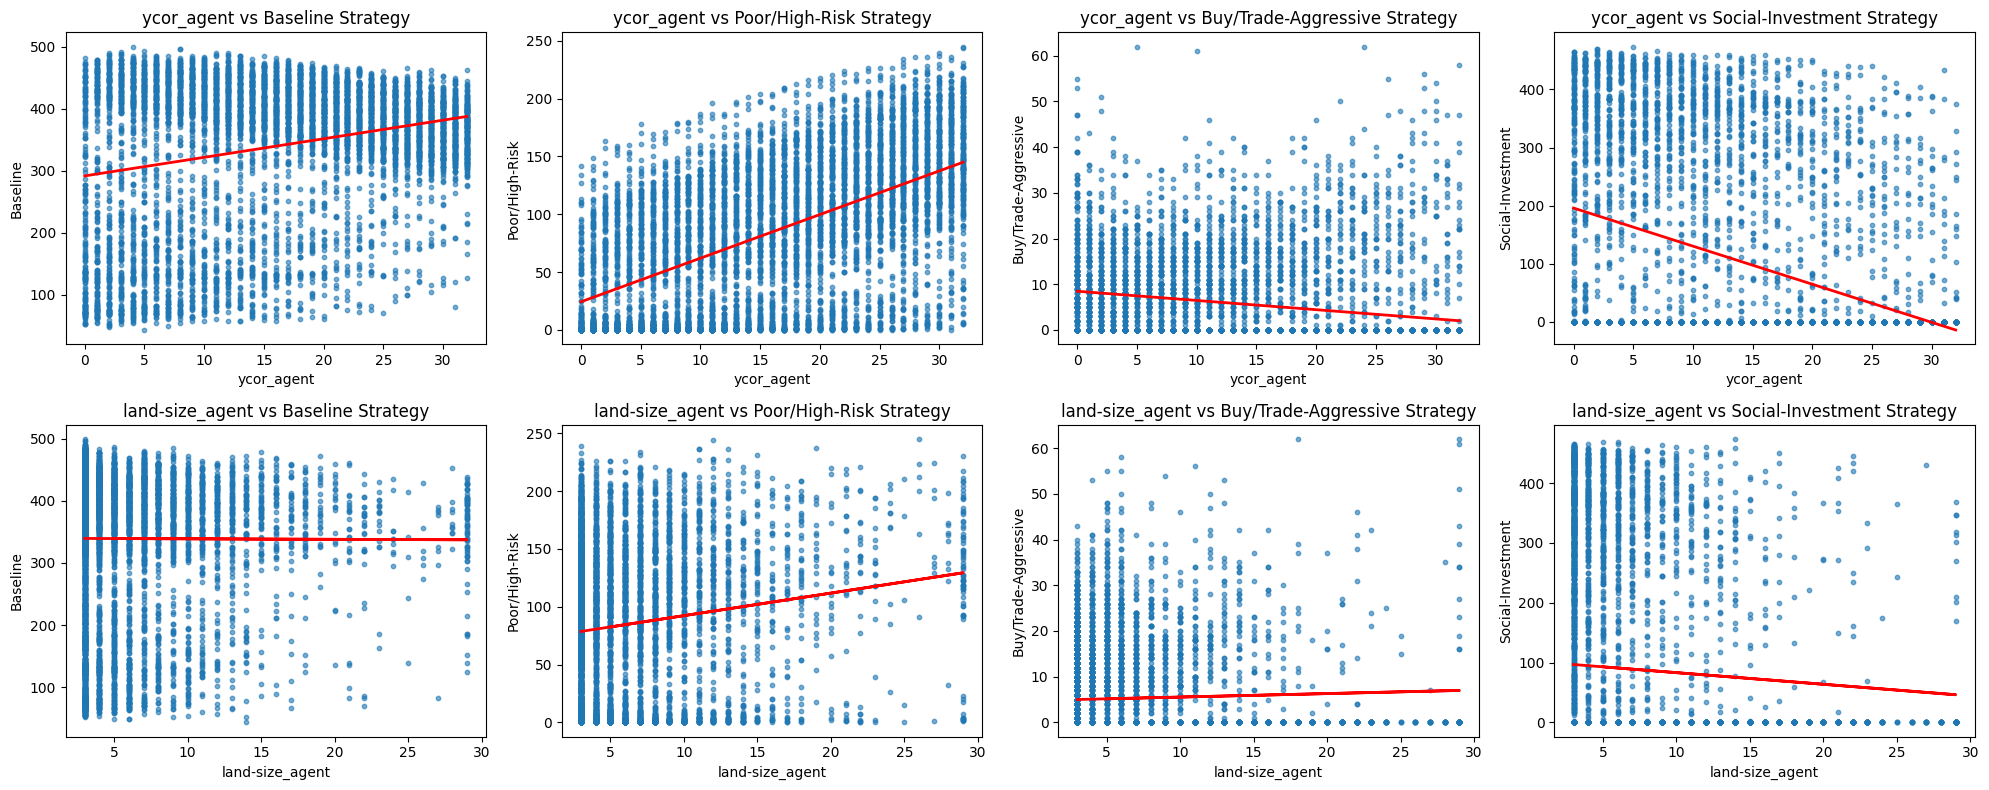

In [38]:
# --- Strategy usage per-position analysis (4 positions) ---
# Expand strategies-used_agent (each is a list of 4 values) into four columns and attach to df_farmer_details
strategy_cols = ["Baseline", "Poor/High-Risk", "Buy/Trade-Aggressive", "Social-Investment"]
strategies_expanded = pd.DataFrame(df_farmer_details['strategies-used_agent'].tolist(), columns=strategy_cols).fillna(0).astype(int)
for s in strategy_cols:
    df_farmer_details[s] = strategies_expanded[s]

# Per-farmer correlations: ycor and land-size with each strategy position
farmer_vars = ['ycor_agent', 'land-size_agent']
print('\nPer-farmer correlations: ycor/land-size vs strategy positions')
for v in farmer_vars:
    for s in strategy_cols:
        corr = df_farmer_details[v].corr(df_farmer_details[s])
        print(f" {v} vs {s}: {corr:.4f}")

# Scattergrid: 2 rows (ycor, land-size) x 4 cols (strategy_0..strategy_3)
fig, axes = plt.subplots(2, len(strategy_cols), figsize=(5*len(strategy_cols), 8))
for i, v in enumerate(farmer_vars):
    for j, s in enumerate(strategy_cols):
        ax = axes[i, j] if len(strategy_cols) > 1 else axes[i]

        x = df_farmer_details[v]
        y = df_farmer_details[s]

        # Scatter plot
        ax.scatter(x, y, s=10, alpha=0.6)

        # Line of best fit
        mask = x.notna() & y.notna()
        if mask.sum() > 1:  # avoid polyfit errors
            m, b = np.polyfit(x[mask], y[mask], 1)
            ax.plot(x, m*x + b, color='red', lw=2)

        ax.set_xlabel(v)
        ax.set_ylabel(s)
        ax.set_title(f"{v} vs {s} Strategy")
plt.tight_layout()
plt.show()

/tmp/ipykernel_5172/418414388.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[s].mean().reset_index()
/tmp/ipykernel_5172/418414388.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[s].mean().reset_index()
/tmp/ipykernel_5172/418414388.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = d

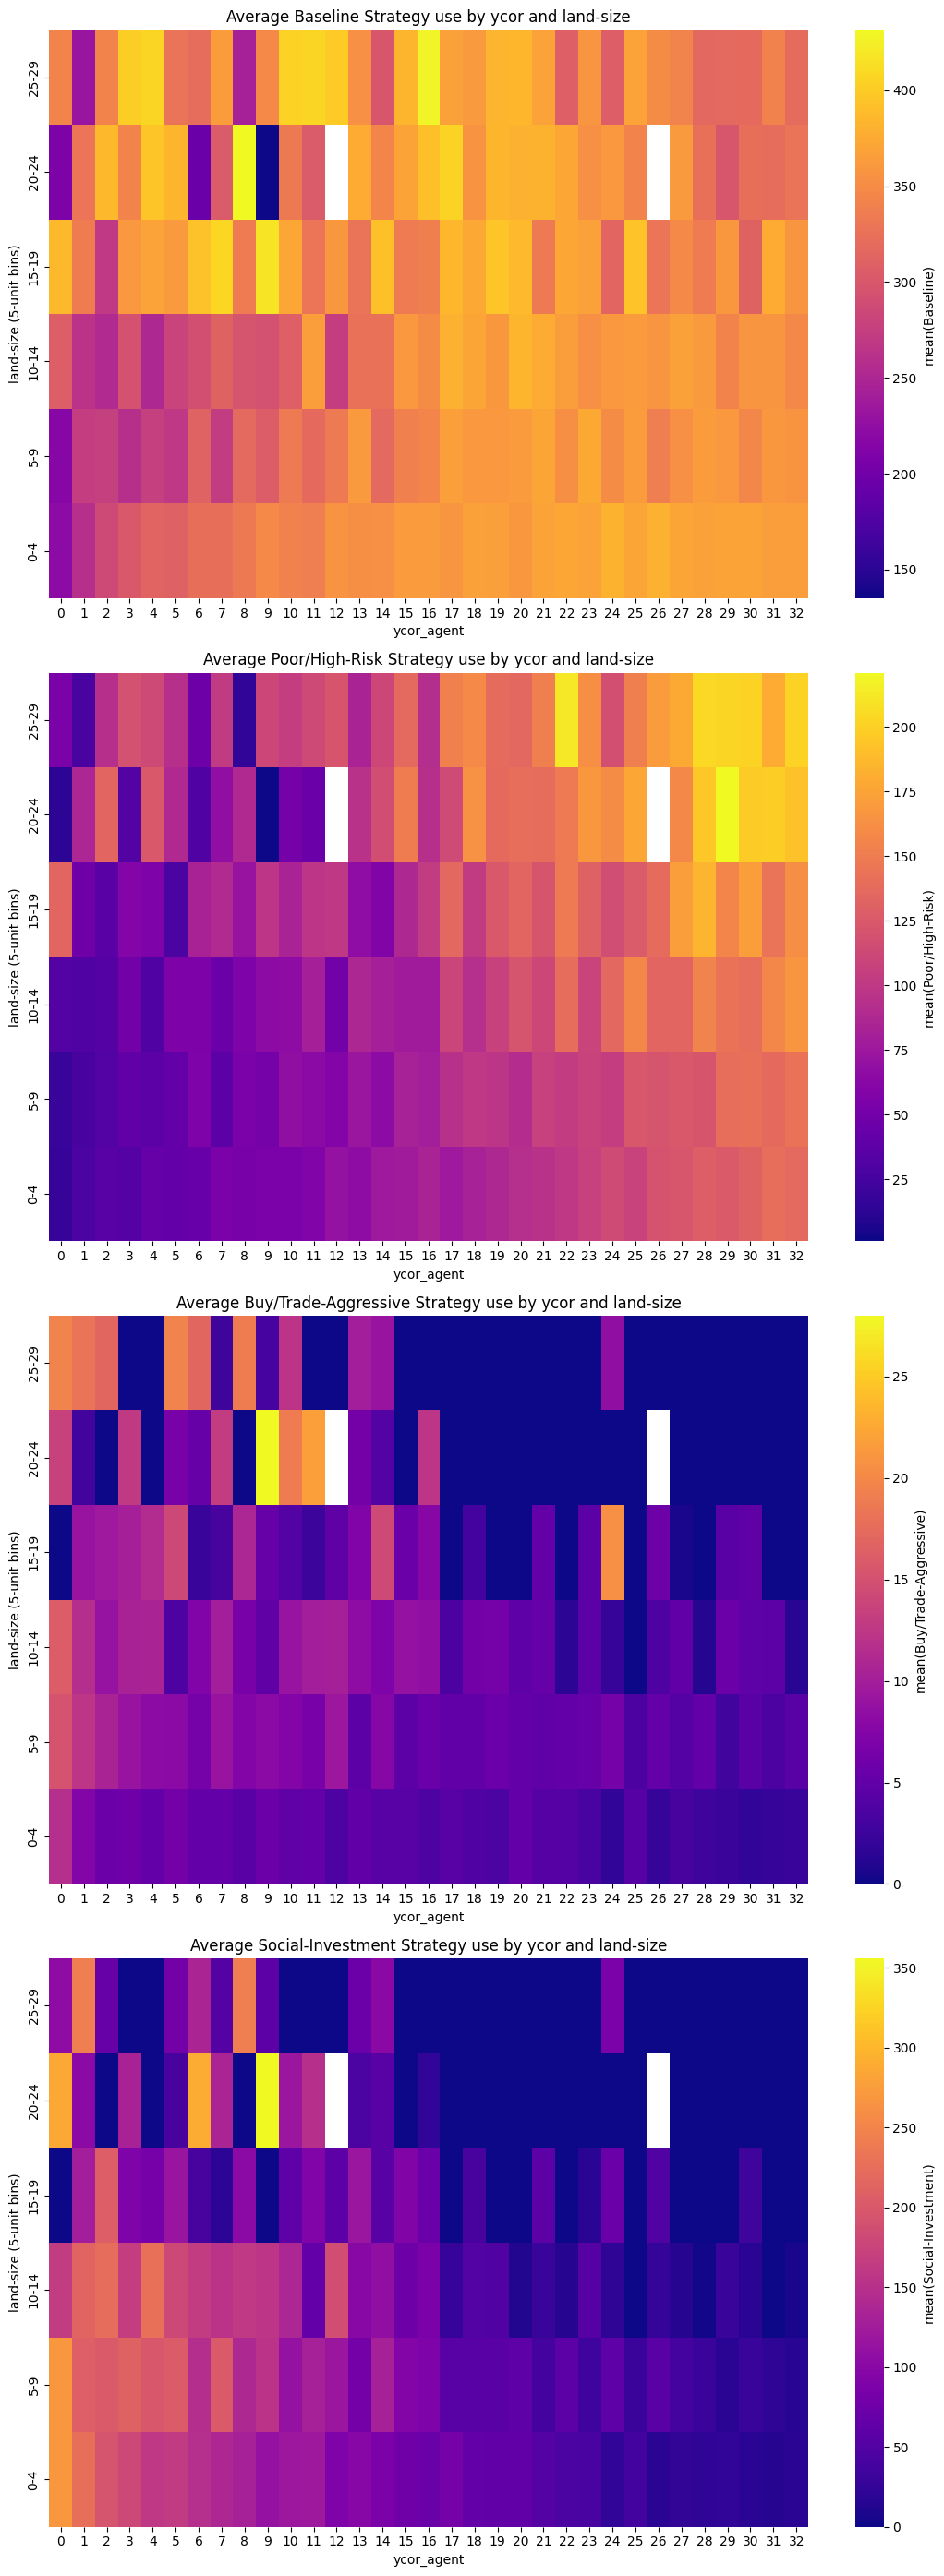

In [39]:
# Binned heatmaps for strategy usage (4 positions)
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure strategy columns exist (expand if not already present)
strategy_cols = ["Baseline", "Poor/High-Risk", "Buy/Trade-Aggressive", "Social-Investment"]
if not all(s in df_farmer_details.columns for s in strategy_cols):
    strategies_expanded = pd.DataFrame(df_farmer_details['strategies-used_agent'].tolist(), columns=strategy_cols).fillna(0).astype(int)
    for s in strategy_cols:
        df_farmer_details[s] = strategies_expanded[s]

# Reuse land_bin if present, otherwise create
if 'land_bin' not in df_farmer_details.columns:
    min_land = int(df_farmer_details['land-size_agent'].min())
    max_land = int(df_farmer_details['land-size_agent'].max())
    bins = list(range((min_land // 5) * 5, ((max_land // 5) + 2) * 5, 5))
    labels = [f"{b}-{b+4}" for b in bins[:-1]]
    df_farmer_details['land_bin'] = pd.cut(df_farmer_details['land-size_agent'], bins=bins, labels=labels, right=False, include_lowest=True)
else:
    labels = sorted(df_farmer_details['land_bin'].cat.categories, key=lambda x: (int(str(x).split('-')[0]) if pd.notna(x) else 0))

# One figure with 4x1 heatmaps (one per strategy position)
fig, axes = plt.subplots(4, 1, figsize=(11, 7*4))
for i, s in enumerate(strategy_cols):
    grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[s].mean().reset_index()
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=s)
    pivot = pivot.reindex(labels)  # ensure ordered land bins
    try:
        sorted_cols = sorted([col for col in pivot.columns if not pd.isna(col)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass
    ax = axes[i] if len(strategy_cols) > 1 else axes
    sns.heatmap(pivot, ax=ax, cmap='plasma', cbar_kws={'label': f'mean({s})'}, annot=False, fmt='.2f')
    ax.set_title(f'Average {s} Strategy use by ycor and land-size')
    ax.set_xlabel('ycor_agent')
    ax.set_ylabel('land-size (5-unit bins)')
    ax.invert_yaxis()
plt.tight_layout()
plt.show()

# Base Flow Experiment

In [40]:
df = pd.read_csv('project vary-flow-table.csv', skiprows=6)
df = df.drop(columns= df.columns[:27])
df = df.drop(columns=df.columns[1:8])
df.rename(columns={df.columns[0]: "Base Flow", df.columns[1]: "Average Wealth", df.columns[2]: "Wealth Standard Deviation", df.columns[3]: "Total Theft Volume", df.columns[4]: "Total Trade Volume", df.columns[5]: "Average Friendship Strength", df.columns[6]: "Average Social Credit"}, inplace=True)
df["report-all-farmer-data"] = df["report-all-farmer-data"].str.replace(" ", ",")
import ast
df_farmer_data = pd.DataFrame({"parsed_farmer_data" : df["report-all-farmer-data"].apply(ast.literal_eval)})
df_exploded = df_farmer_data.explode("parsed_farmer_data").reset_index(drop=True)

FARMER_COLUMNS = [
    'ycor_agent', 'land-size_agent', 'wealth_agent', 
    'social-credit_agent', 'times-robbed_agent', 'num-shares_agent', 
    'crops-used_agent', 'strategies-used_agent'
]

farmer_attributes = pd.Series(df_exploded['parsed_farmer_data'])

df_farmer_details = pd.DataFrame(
    farmer_attributes.tolist(), 
    columns=FARMER_COLUMNS
)

df_farmer_details

# build sim_id mapping (df_farmer_data contains the list-of-farmers per simulation)
sim_counts = df_farmer_data['parsed_farmer_data'].apply(len).values
sim_ids = np.repeat(df.index.values, sim_counts)  # df.index corresponds to simulation rows
df_farmer_details['sim_id'] = sim_ids

Correlation of Base Flow with simulation metrics:
 Base Flow vs Average Wealth: 0.930
 Base Flow vs Wealth Standard Deviation: 0.874
 Base Flow vs Total Theft Volume: -0.758
 Base Flow vs Total Trade Volume: -0.143
 Base Flow vs Average Friendship Strength: -0.691
 Base Flow vs Average Social Credit: 0.734


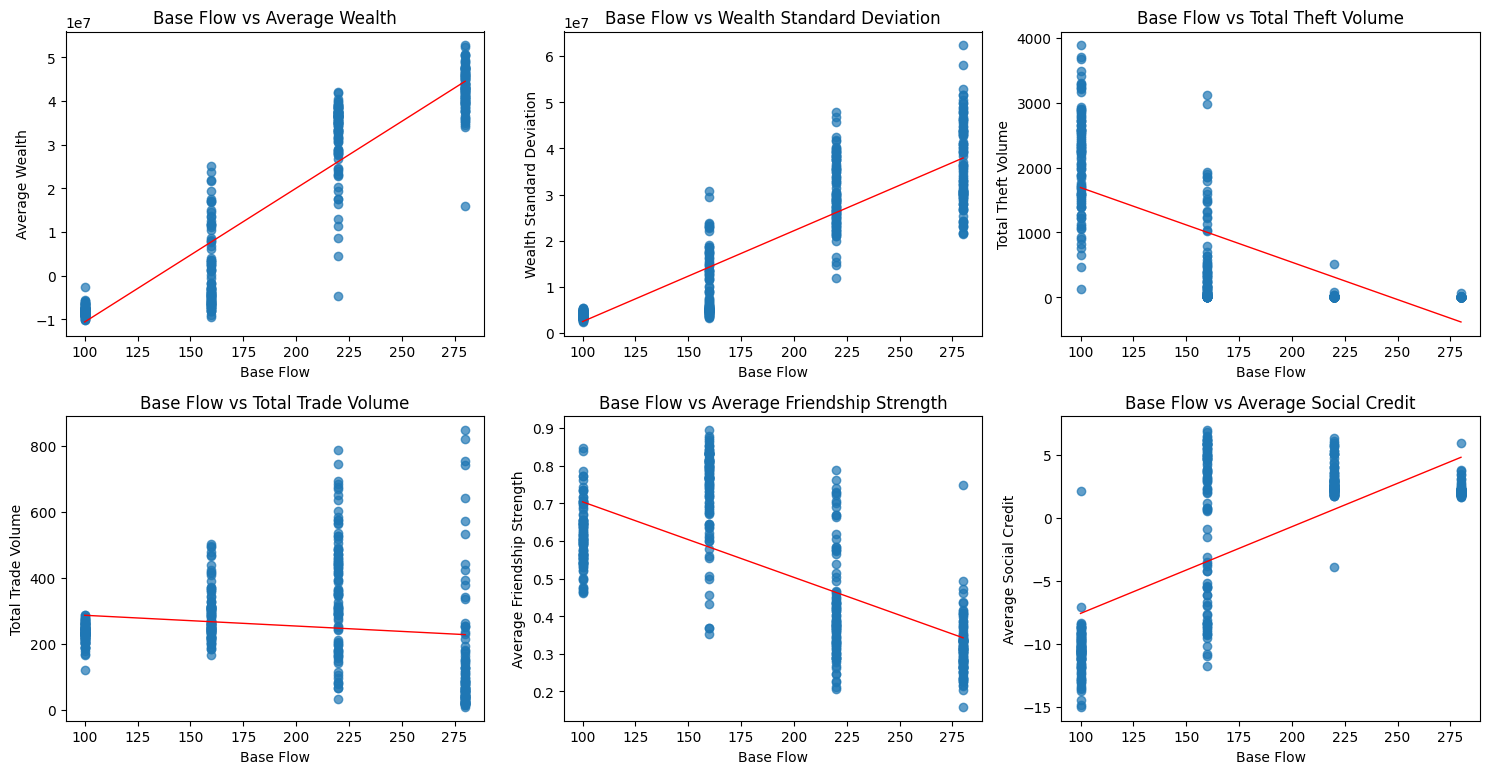

In [41]:
# Correlations of total land with simulation-level metrics
metrics = df.columns[1:7]  # assuming these are the metrics of interest

indep = "Base Flow"

print(f"Correlation of {indep} with simulation metrics:")
for m in metrics:
    print(f" {indep} vs {m}: {df[indep].corr(df[m]):.3f}")

# Scatter plots: Base Flow vs each metric (2x3)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()
for ax, m in zip(axes, metrics):
    ax.scatter(df[indep], df[m], alpha=0.7)
    # simple linear fit line
    try:
        coef = np.polyfit(df[indep], df[m], 1)
        xs = np.linspace(df[indep].min(), df[indep].max(), 50)
        ax.plot(xs, np.polyval(coef, xs), color='red', lw=1)
    except Exception:
        pass
    ax.set_xlabel(indep)
    ax.set_ylabel(m)
    ax.set_title(f"{indep} vs {m}")
plt.tight_layout()
plt.show()

In [42]:
# 1D binned heatmap: x = ycor_agent, y = land-size_agent buckets (width=5), color = mean(attribute)
farmer_targets = ['wealth_agent']

for attribute in farmer_targets:
    # Create land-size bins of width 4
    min_land = int(df_farmer_details['land-size_agent'].min())
    max_land = int(df_farmer_details['land-size_agent'].max())
    bins = list(range((min_land // 4) * 5, ((max_land // 5) + 2) * 5, 5))
    labels = [f"{b}-{b+3}" for b in bins[:-1]]
    df_farmer_details['land_bin'] = pd.cut(df_farmer_details['land-size_agent'], bins=bins, labels=labels, right=False, include_lowest=True)

    # Group by land-bin and ycor and compute mean of the attribute
    grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()

    # Pivot to wide format: rows = land_bin, cols = ycor_agent
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=attribute)

    # Sort rows (land bins) and columns (ycor) for consistent plotting
    pivot = pivot.reindex(labels)  # ensure all land bins are present in order
    try:
        # If ycor_agent is numeric, sort columns numerically
        sorted_cols = sorted([c for c in pivot.columns if not pd.isna(c)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass

/tmp/ipykernel_5172/829072313.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


/tmp/ipykernel_5172/2276725043.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = sub_farmer.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()
/tmp/ipykernel_5172/2276725043.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = sub_farmer.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()
/tmp/ipykernel_5172/2276725043.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

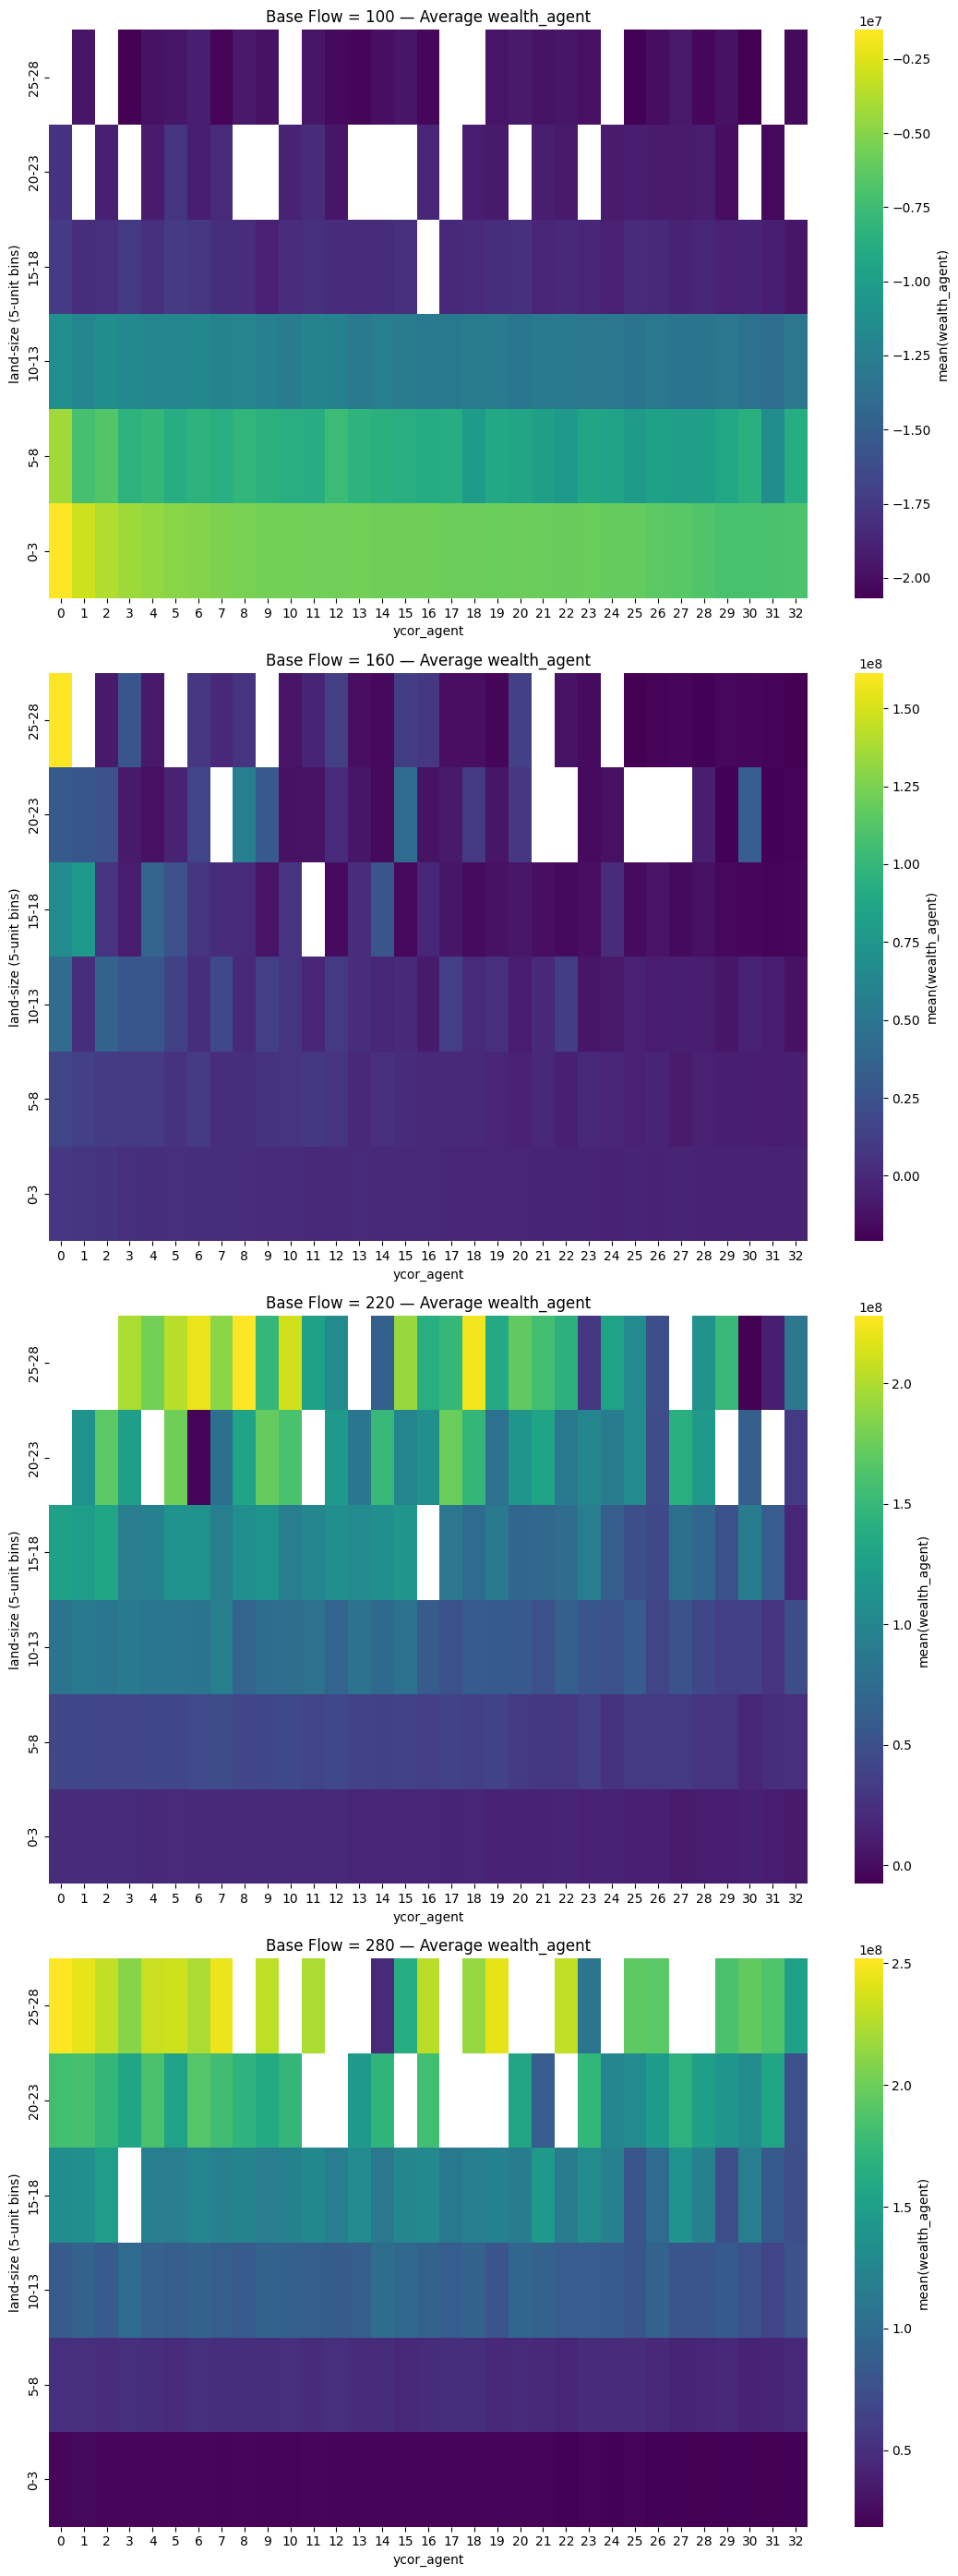

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

base_flows = sorted(df['Base Flow'].unique())
fig, axes = plt.subplots(
    len(base_flows), 1,
    figsize=(11, 7 * len(base_flows)),
    squeeze=False
)

ax_idx = 0

for bf in base_flows:
    sim_idxs = df.index[df['Base Flow'] == bf].tolist()
    sub_farmer = df_farmer_details[df_farmer_details['sim_id'].isin(sim_idxs)]
    if sub_farmer.empty:
        # no farmer rows for this Base Flow, skip
        continue

    grp = sub_farmer.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=attribute)
    pivot = pivot.reindex(labels)  # ensure ordered rows
    try:
        sorted_cols = sorted([c for c in pivot.columns if not pd.isna(c)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass

    ax = axes[ax_idx, 0]

    sns.heatmap(
        pivot,
        cmap='viridis',
        cbar_kws={'label': f'mean({attribute})'},
        annot=False,
        fmt='.2f',
        ax=ax
    )

    ax.set_title(f'Base Flow = {bf} — Average {attribute}')
    ax.set_xlabel('ycor_agent')
    ax.set_ylabel('land-size (5-unit bins)')
    ax.invert_yaxis()

    ax_idx += 1

plt.tight_layout()
plt.show()


# Water Randomness Experiment

In [61]:
df = pd.read_csv('project vary-water-randomness-table.csv', skiprows=6)
df = df.drop(columns= df.columns[:34])
df.rename(columns={df.columns[0]: "Water Randomness", df.columns[1]: "Average Wealth", df.columns[2]: "Wealth Standard Deviation", df.columns[3]: "Total Theft Volume", df.columns[4]: "Total Trade Volume", df.columns[5]: "Average Friendship Strength", df.columns[6]: "Average Social Credit"}, inplace=True)
df["report-all-farmer-data"] = df["report-all-farmer-data"].str.replace(" ", ",")
import ast
df_farmer_data = pd.DataFrame({"parsed_farmer_data" : df["report-all-farmer-data"].apply(ast.literal_eval)})
df_exploded = df_farmer_data.explode("parsed_farmer_data").reset_index(drop=True)

FARMER_COLUMNS = [
    'ycor_agent', 'land-size_agent', 'wealth_agent', 
    'social-credit_agent', 'times-robbed_agent', 'num-shares_agent', 
    'crops-used_agent', 'strategies-used_agent'
]

farmer_attributes = pd.Series(df_exploded['parsed_farmer_data'])

df_farmer_details = pd.DataFrame(
    farmer_attributes.tolist(), 
    columns=FARMER_COLUMNS
)

df_farmer_details

# build sim_id mapping (df_farmer_data contains the list-of-farmers per simulation)
sim_counts = df_farmer_data['parsed_farmer_data'].apply(len).values
sim_ids = np.repeat(df.index.values, sim_counts)  # df.index corresponds to simulation rows
df_farmer_details['sim_id'] = sim_ids
# Correlations of total land with simulation-level metrics
metrics = df.columns[1:7]  # assuming these are the metrics of interest



Correlation of Water Randomness with simulation metrics:
 Water Randomness vs Average Wealth: 0.050
 Water Randomness vs Wealth Standard Deviation: 0.021
 Water Randomness vs Total Theft Volume: -0.059
 Water Randomness vs Total Trade Volume: 0.289
 Water Randomness vs Average Friendship Strength: 0.115
 Water Randomness vs Average Social Credit: 0.169


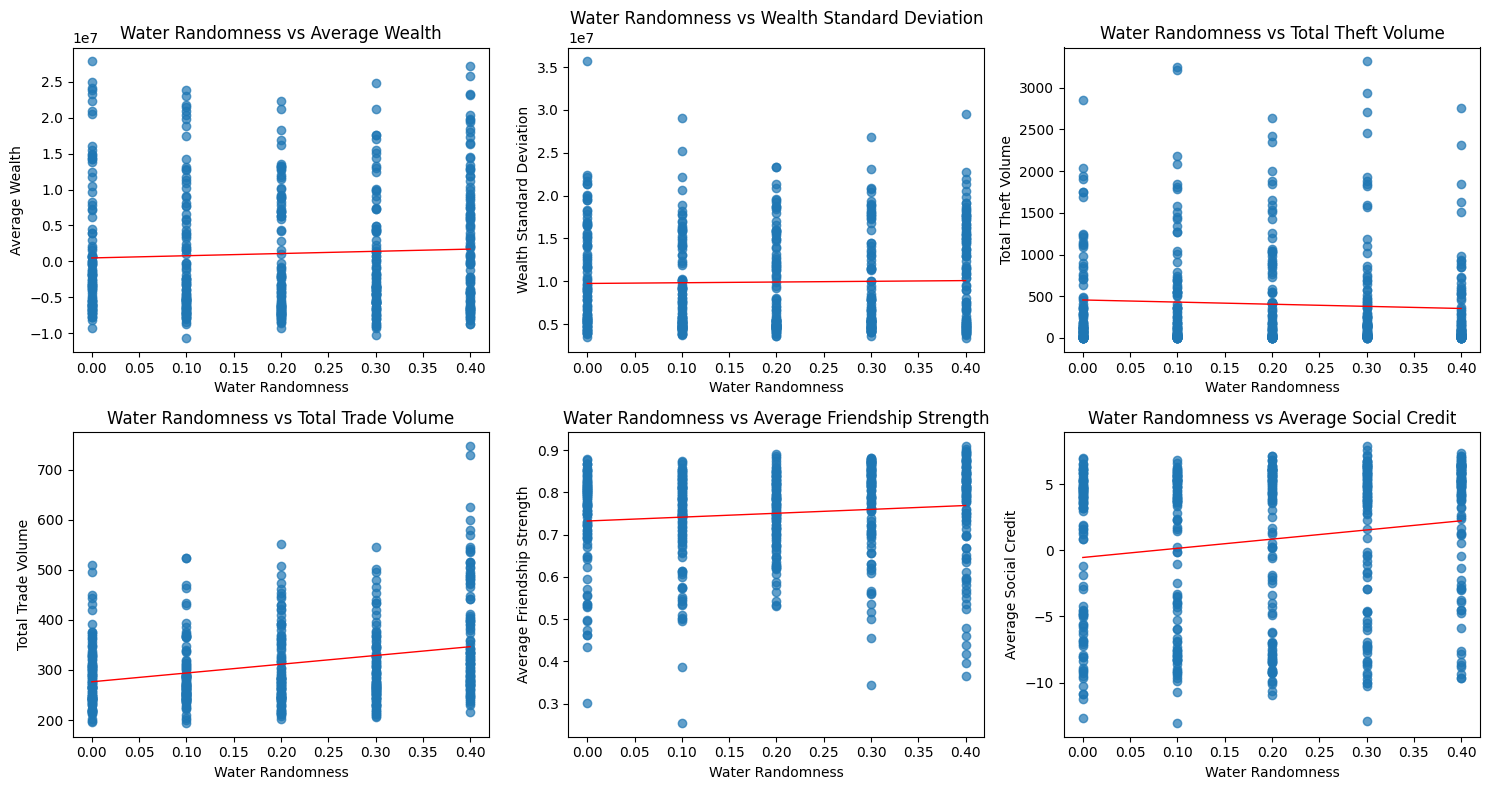

/tmp/ipykernel_5172/2733877675.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


In [62]:
indep = "Water Randomness"

print(f"Correlation of {indep} with simulation metrics:")
for m in metrics:
    print(f" {indep} vs {m}: {df[indep].corr(df[m]):.3f}")

# Scatter plots: Base Flow vs each metric (2x3)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()
for ax, m in zip(axes, metrics):
    ax.scatter(df[indep], df[m], alpha=0.7)
    # simple linear fit line
    try:
        coef = np.polyfit(df[indep], df[m], 1)
        xs = np.linspace(df[indep].min(), df[indep].max(), 50)
        ax.plot(xs, np.polyval(coef, xs), color='red', lw=1)
    except Exception:
        pass
    ax.set_xlabel(indep)
    ax.set_ylabel(m)
    ax.set_title(f"{indep} vs {m}")
plt.tight_layout()
plt.show()
# 1D binned heatmap: x = ycor_agent, y = land-size_agent buckets (width=5), color = mean(attribute)
farmer_targets = ['wealth_agent']

for attribute in farmer_targets:
    # Create land-size bins of width 4
    min_land = int(df_farmer_details['land-size_agent'].min())
    max_land = int(df_farmer_details['land-size_agent'].max())
    bins = list(range((min_land // 4) * 5, ((max_land // 5) + 2) * 5, 5))
    labels = [f"{b}-{b+3}" for b in bins[:-1]]
    df_farmer_details['land_bin'] = pd.cut(df_farmer_details['land-size_agent'], bins=bins, labels=labels, right=False, include_lowest=True)

    # Group by land-bin and ycor and compute mean of the attribute
    grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()

    # Pivot to wide format: rows = land_bin, cols = ycor_agent
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=attribute)

    # Sort rows (land bins) and columns (ycor) for consistent plotting
    pivot = pivot.reindex(labels)  # ensure all land bins are present in order
    try:
        # If ycor_agent is numeric, sort columns numerically
        sorted_cols = sorted([c for c in pivot.columns if not pd.isna(c)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass


/tmp/ipykernel_5172/2340242876.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = sub_farmer.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()
/tmp/ipykernel_5172/2340242876.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = sub_farmer.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()
/tmp/ipykernel_5172/2340242876.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

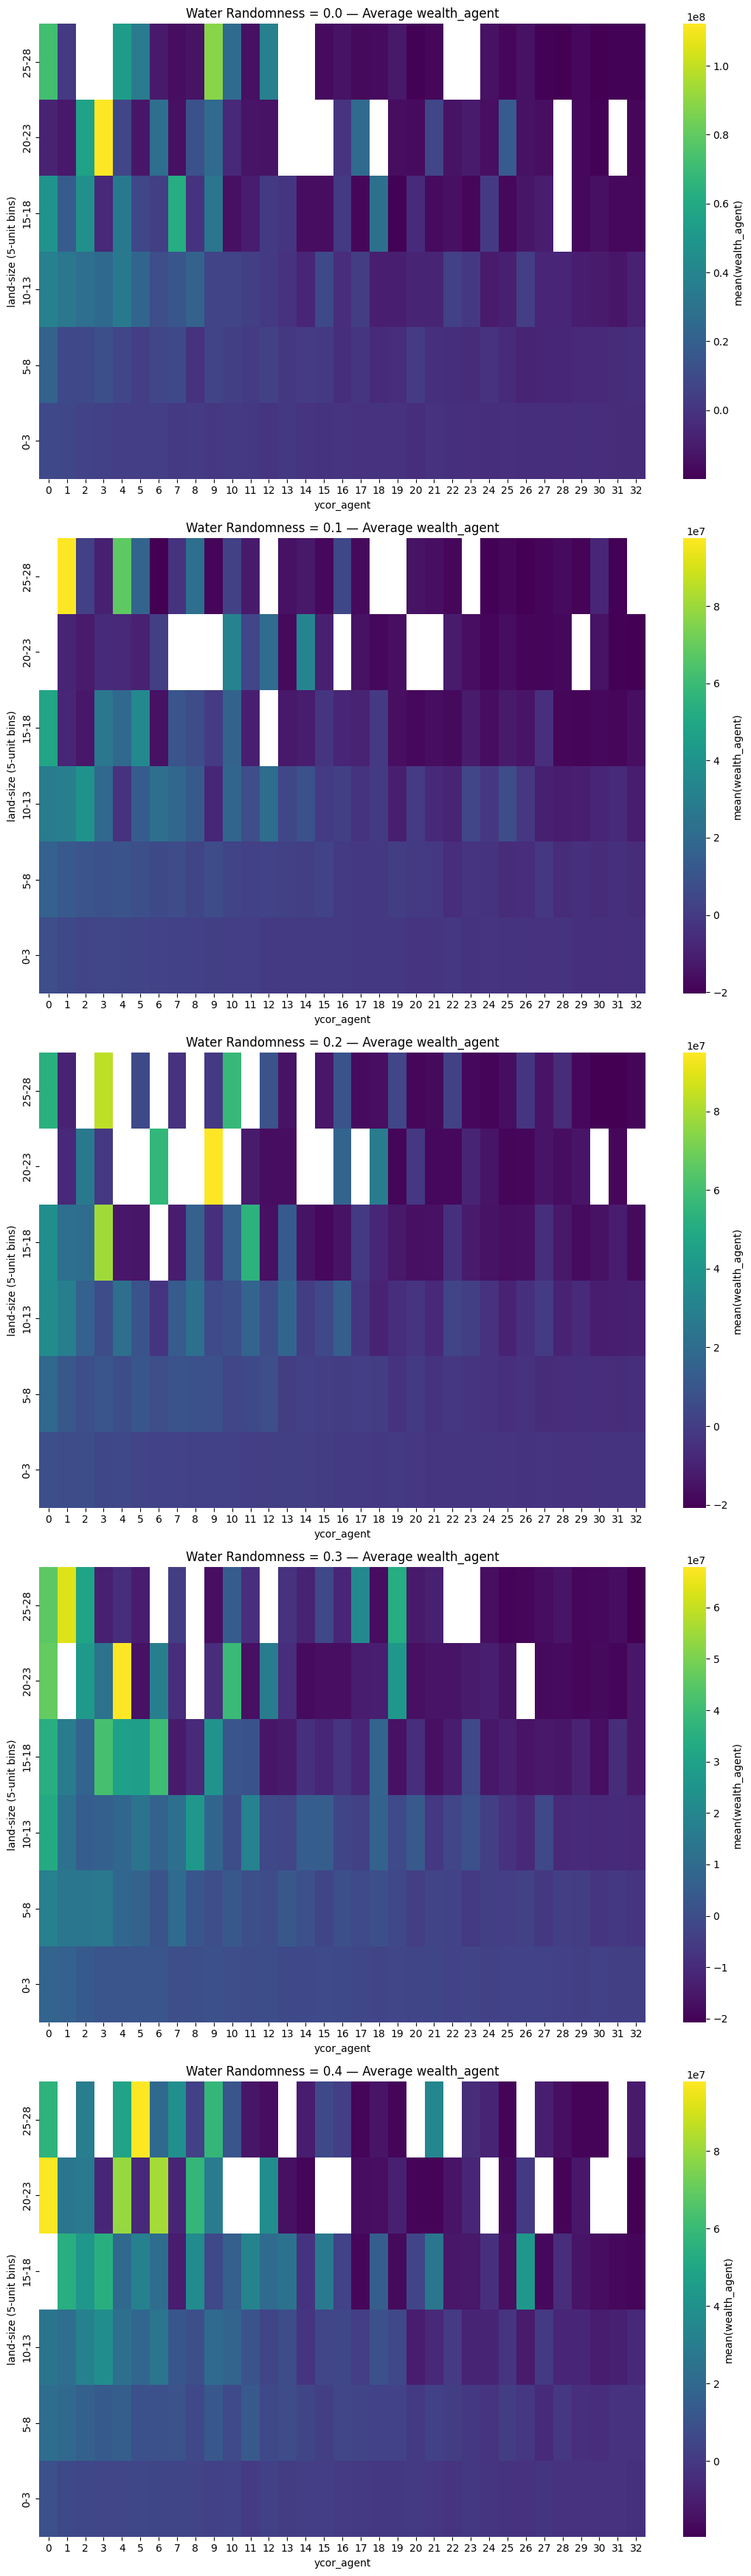

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

base_flows = sorted(df[indep].unique())
fig, axes = plt.subplots(
    len(base_flows), 1,
    figsize=(11, 7 * len(base_flows)),
    squeeze=False
)

ax_idx = 0

for bf in base_flows:
    sim_idxs = df.index[df[indep] == bf].tolist()
    sub_farmer = df_farmer_details[df_farmer_details['sim_id'].isin(sim_idxs)]
    if sub_farmer.empty:
        # no farmer rows for this Base Flow, skip
        continue

    grp = sub_farmer.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=attribute)
    pivot = pivot.reindex(labels)  # ensure ordered rows
    try:
        sorted_cols = sorted([c for c in pivot.columns if not pd.isna(c)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass

    ax = axes[ax_idx, 0]

    sns.heatmap(
        pivot,
        cmap='viridis',
        cbar_kws={'label': f'mean({attribute})'},
        annot=False,
        fmt='.2f',
        ax=ax
    )

    ax.set_title(f'{indep} = {bf} — Average {attribute}')
    ax.set_xlabel('ycor_agent')
    ax.set_ylabel('land-size (5-unit bins)')
    ax.invert_yaxis()

    ax_idx += 1

plt.tight_layout()
plt.show()


# Crop Stage Variance Experiment

In [57]:
df = pd.read_csv('project vary-crop-stage-variance-table.csv', skiprows=6)
df = df.drop(columns= df.columns[:34])
df.rename(columns={df.columns[0]: "Crop Stage Variance", df.columns[1]: "Average Wealth", df.columns[2]: "Wealth Standard Deviation", df.columns[3]: "Total Theft Volume", df.columns[4]: "Total Trade Volume", df.columns[5]: "Average Friendship Strength", df.columns[6]: "Average Social Credit"}, inplace=True)
df["report-all-farmer-data"] = df["report-all-farmer-data"].str.replace(" ", ",")
import ast
df_farmer_data = pd.DataFrame({"parsed_farmer_data" : df["report-all-farmer-data"].apply(ast.literal_eval)})
df_exploded = df_farmer_data.explode("parsed_farmer_data").reset_index(drop=True)

FARMER_COLUMNS = [
    'ycor_agent', 'land-size_agent', 'wealth_agent', 
    'social-credit_agent', 'times-robbed_agent', 'num-shares_agent', 
    'crops-used_agent', 'strategies-used_agent'
]

farmer_attributes = pd.Series(df_exploded['parsed_farmer_data'])

df_farmer_details = pd.DataFrame(
    farmer_attributes.tolist(), 
    columns=FARMER_COLUMNS
)

df_farmer_details

# build sim_id mapping (df_farmer_data contains the list-of-farmers per simulation)
sim_counts = df_farmer_data['parsed_farmer_data'].apply(len).values
sim_ids = np.repeat(df.index.values, sim_counts)  # df.index corresponds to simulation rows
df_farmer_details['sim_id'] = sim_ids
# Correlations of total land with simulation-level metrics
metrics = df.columns[1:7]  # assuming these are the metrics of interest



Correlation of Crop Stage Variance with simulation metrics:
 Crop Stage Variance vs Average Wealth: 0.115
 Crop Stage Variance vs Wealth Standard Deviation: -0.015
 Crop Stage Variance vs Total Theft Volume: -0.468
 Crop Stage Variance vs Total Trade Volume: 0.869
 Crop Stage Variance vs Average Friendship Strength: 0.624
 Crop Stage Variance vs Average Social Credit: 0.749


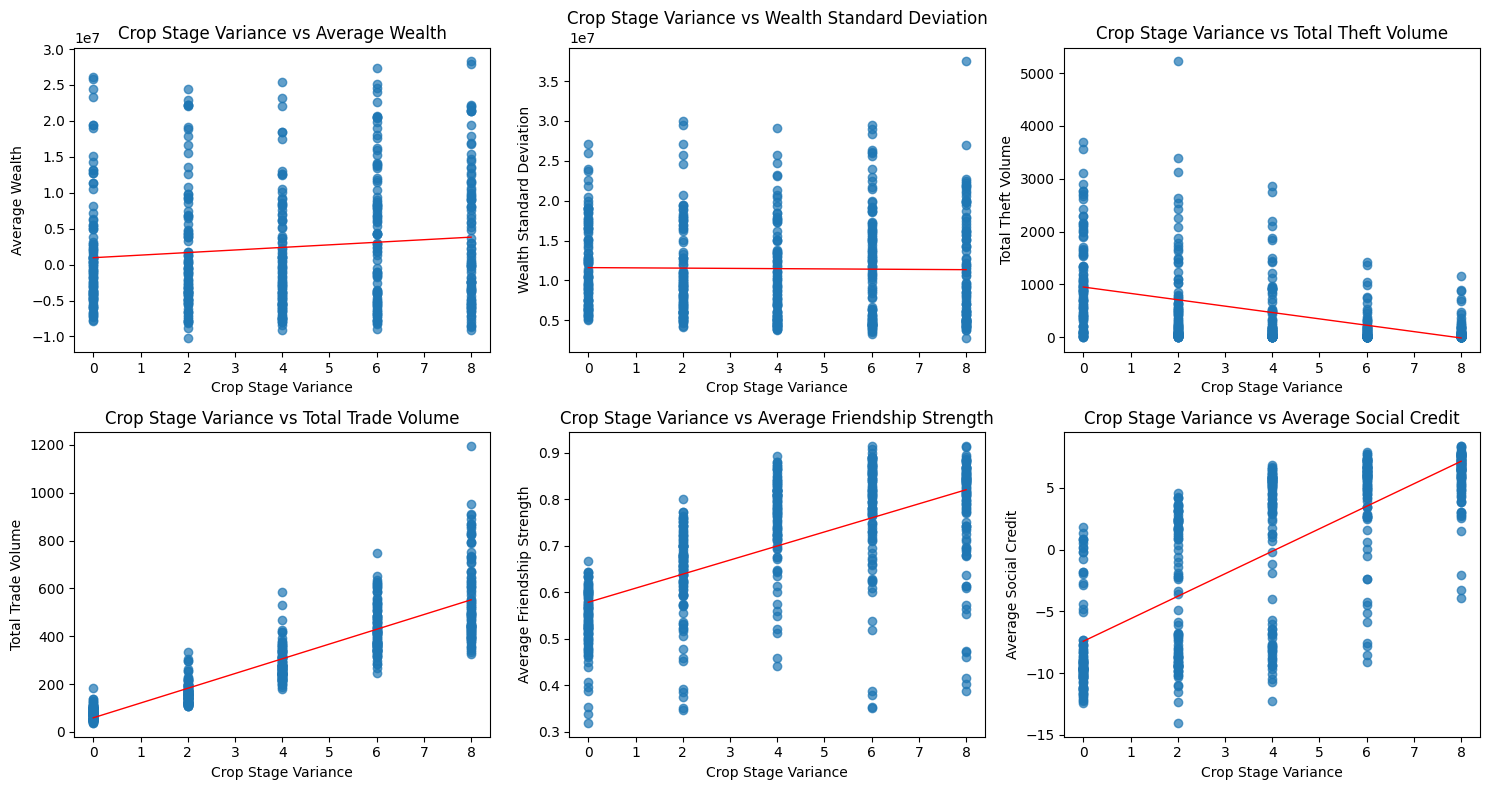

/tmp/ipykernel_5172/2470393699.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


In [58]:
indep = "Crop Stage Variance"

print(f"Correlation of {indep} with simulation metrics:")
for m in metrics:
    print(f" {indep} vs {m}: {df[indep].corr(df[m]):.3f}")

# Scatter plots: Base Flow vs each metric (2x3)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()
for ax, m in zip(axes, metrics):
    ax.scatter(df[indep], df[m], alpha=0.7)
    # simple linear fit line
    try:
        coef = np.polyfit(df[indep], df[m], 1)
        xs = np.linspace(df[indep].min(), df[indep].max(), 50)
        ax.plot(xs, np.polyval(coef, xs), color='red', lw=1)
    except Exception:
        pass
    ax.set_xlabel(indep)
    ax.set_ylabel(m)
    ax.set_title(f"{indep} vs {m}")
plt.tight_layout()
plt.show()
# 1D binned heatmap: x = ycor_agent, y = land-size_agent buckets (width=5), color = mean(attribute)
farmer_targets = ['wealth_agent']

for attribute in farmer_targets:
    # Create land-size bins of width 4
    min_land = int(df_farmer_details['land-size_agent'].min())
    max_land = int(df_farmer_details['land-size_agent'].max())
    bins = list(range((min_land // 4) * 5, ((max_land // 5) + 2) * 5, 5))
    labels = [f"{b}-{b+3}" for b in bins[:-1]]
    df_farmer_details['land_bin'] = pd.cut(df_farmer_details['land-size_agent'], bins=bins, labels=labels, right=False, include_lowest=True)

    # Group by land-bin and ycor and compute mean of the attribute
    grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()

    # Pivot to wide format: rows = land_bin, cols = ycor_agent
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=attribute)

    # Sort rows (land bins) and columns (ycor) for consistent plotting
    pivot = pivot.reindex(labels)  # ensure all land bins are present in order
    try:
        # If ycor_agent is numeric, sort columns numerically
        sorted_cols = sorted([c for c in pivot.columns if not pd.isna(c)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass



/tmp/ipykernel_5172/2169677338.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = sub_farmer.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()
/tmp/ipykernel_5172/2169677338.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = sub_farmer.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()
/tmp/ipykernel_5172/2169677338.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

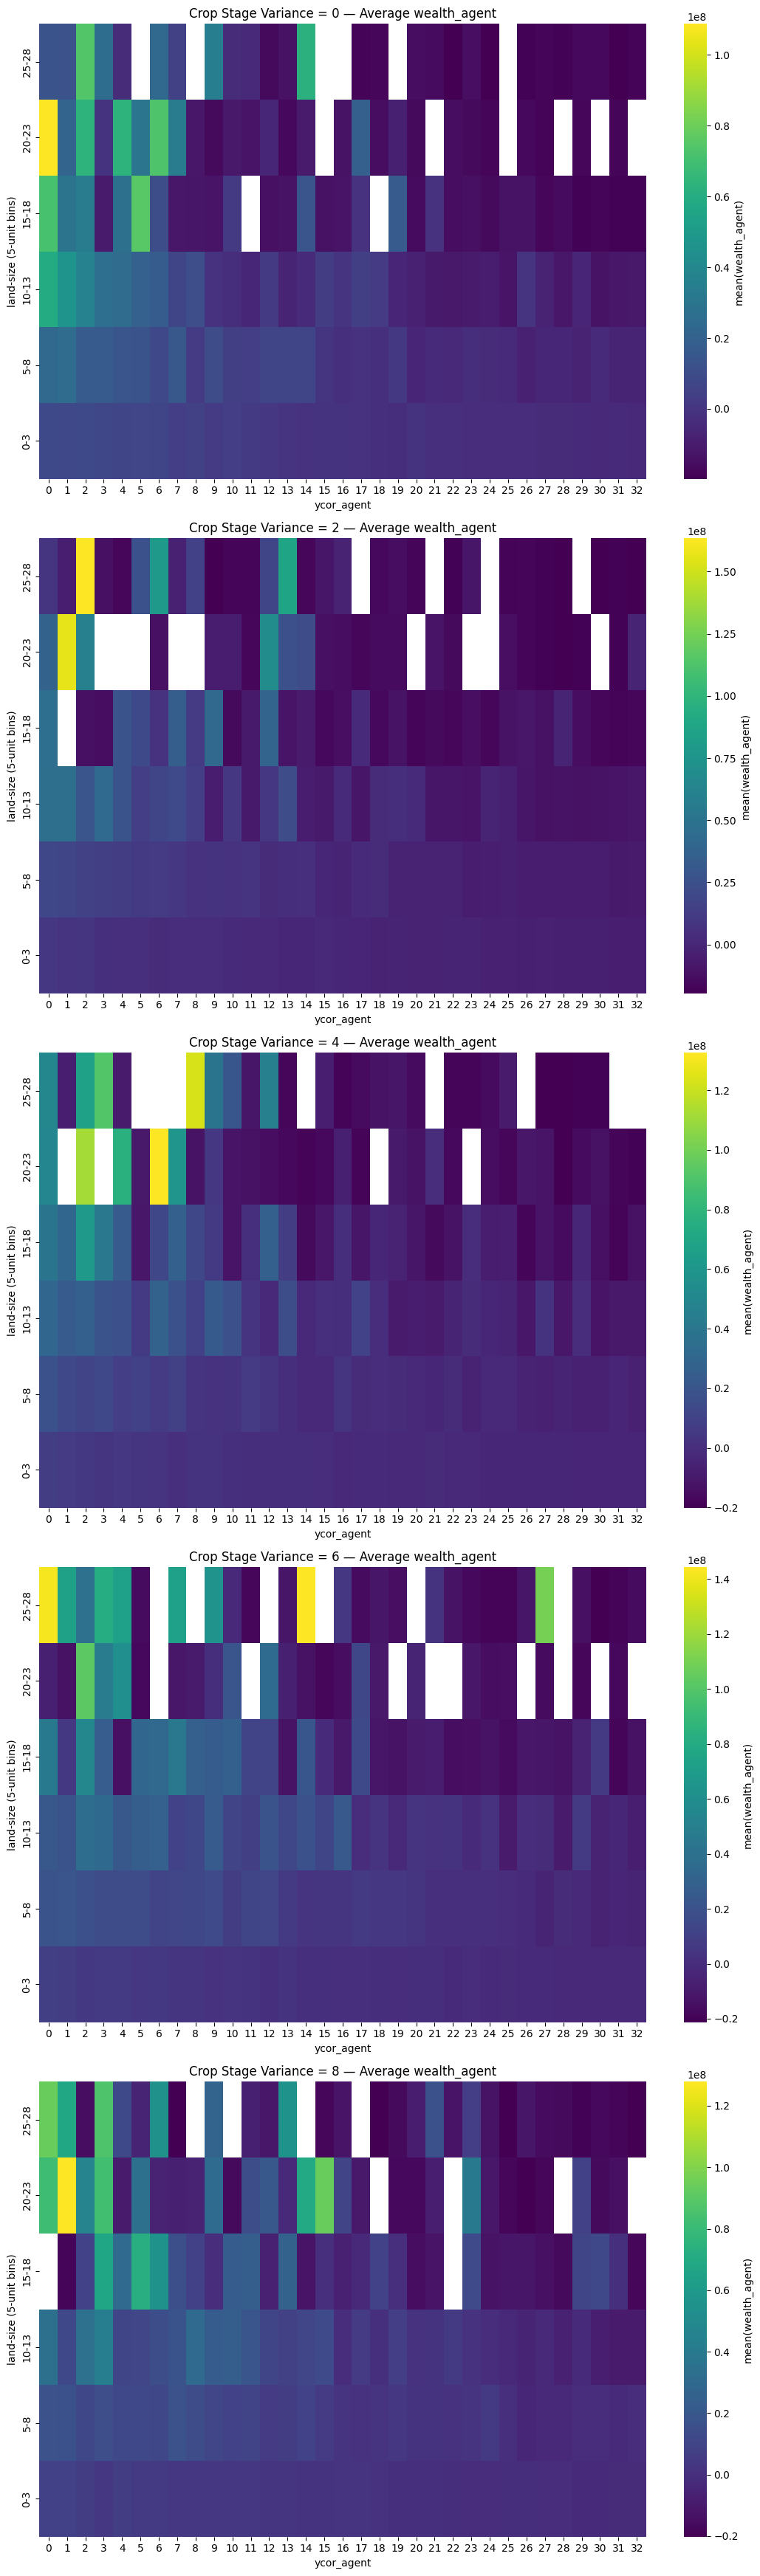

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

base_flows = sorted(df[indep].unique())
fig, axes = plt.subplots(
    len(base_flows), 1,
    figsize=(11, 7 * len(base_flows)),
    squeeze=False
)

ax_idx = 0

for bf in base_flows:
    sim_idxs = df.index[df[indep] == bf].tolist()
    sub_farmer = df_farmer_details[df_farmer_details['sim_id'].isin(sim_idxs)]
    if sub_farmer.empty:
        # no farmer rows for this Base Flow, skip
        continue

    grp = sub_farmer.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=attribute)
    pivot = pivot.reindex(labels)  # ensure ordered rows
    try:
        sorted_cols = sorted([c for c in pivot.columns if not pd.isna(c)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass

    ax = axes[ax_idx, 0]

    sns.heatmap(
        pivot,
        cmap='viridis',
        cbar_kws={'label': f'mean({attribute})'},
        annot=False,
        fmt='.2f',
        ax=ax
    )

    ax.set_title(f'{indep} = {bf} — Average {attribute}')
    ax.set_xlabel('ycor_agent')
    ax.set_ylabel('land-size (5-unit bins)')
    ax.invert_yaxis()

    ax_idx += 1

plt.tight_layout()
plt.show()